<img src="https://fcytvirtual.uader.edu.ar/pluginfile.php/1/theme_klass/logo/1683584239/miuader.PNG" alt="UADER | FCyT" />

# Diplomatura en Ciencias de Datos Aplicada

## Trabajo final | Septiembre 2023

**En este notebook se presenta el enunciado del trabajo final que los distintos grupos deberán desarrollar. A su vez, se introduce también un ejemplo que pueden utilizar para tomar como base en la estructura de sus trabajos.**


# Enunciado

### Análisis de los datos
Seleccionar un conjunto de datos que sea de su interés y tenga al menos 6 variables. Una de ellas deberá ser el "target" del problema en cuestión.

A partir de la elección del conjunto de datos se debe realizar un análisis exploratorio donde se detallen al menos las siguientes cuestiones:

*   Cantidad y tipo de variables de entrada disponibles
*   Cantidad de valores nulos para cada variable
*   Tipo, cantidad de valores nulos y distribución de la variable de salida
*   Análisis de correlación
*   Visualizaciones que ayuden a entender si existe o no alguna relación entre una o más variables de entrada y la variable de salida


### Modelado

Detallar explícitamente cual será la métrica o las métricas que se utilizarán para comparar el desempeño de distintos modelos. Describir también cuál será el método utilizado para asegurar el rendimiento de los mismos (k-fold cross validation, train/test split, etc.). Justifique.

Realizar las transformaciones de datos pertinentes y entrenar al menos 3 modelos diferentes. Comparar los resultados entre ellos y concluir sobre cuál sería el mejor modelo a utilizar. Justifique su elección.

# Trabajo Final - Diplomatura en Ciencia de Datos Aplicada 👩‍💻👨‍💻
### Integrantes:
* Boladeras Facundo
* Fontanini Pablo
* Miller Marcos
* Baeza Noeli

## Explicación del dataset 🌱
Datos de rendimiento de lotes de maíz de primera, desde el ciclo agrícola 2001/02 al 2016/17. El dataset está conformado por las siguientes variables:
* CICLO: del 2001/02 al 2016/17
* EVENTO: El fenómeno conocido como El Niño-Southern Oscillation (ENOS) se clasifica en tres fases: 'Niño', 'Niña' y 'Neutro'. Este evento está relacionado con cambios en la temperatura superficial del mar en el Pacífico. En particular, en el noroeste argentino, durante la fase 'Niño', se observan precipitaciones superiores a las normales, mientras que durante la fase 'Niña', esta misma zona experimenta precipitaciones por debajo de lo normal."
* pp Nov: precipitación promedio por lote durante el mes de noviembre.
* pp Dic: precipitación promedio por lote durante el mes de diciembre.
* pp Ene: precipitación promedio por lote durante el mes de enero.
* IPC: Índice de productividad de suelo. <br>
Se incorporaron datos de **EVI índice de vegetación mejorado** (EVI – Enhanced Vegetation Index) para diferentes fechas, es un parámetro que intenta expresar los efectos atmosféricos sobre la vegetación, calculando la diferencia de radiancia entre las bandas del Azul y Rojo, permitiéndonos, de esa manera, relevar el estado de la vegetación en caso de altas densidades de biomasa. Se diferencia de otros índices ya que es menos sensible al ruido de fondo atmosférico, saturándose en menor proporción al visualizar áreas con vegetación verde muy densa. Es una referencia útil para analizar zonas con cantidades importantes de clorofila, y preferiblemente con efectos topográficos mínimos. El producto EVI fue extraído del sensor satelital MODIS (Moderate-Resolution Imaging Spectroradiometer), producido en intervalos de 16 días. Para las fechas seleccionadas se obtuvo el mínimo, máximo y la media.
* EROSION POTENCIAL: siendo las siguientes categorías; Moderadamente susceptible, Prácticamente no susceptible, Levemente susceptible, Altamente susceptible.
* EVI 1 Nov media: valores promedio de EVI del pixel puro.
* EVI 1 Nov min: valores mínimos de EVI del pixel puro
* EVI 1 Nov max: valores máximos de EVI del pixel puro
* EVI 17 Nov media: valores promedio de EVI del pixel puro
* EVI 17 Nov min: valores mínimos de EVI del pixel puro.
* EVI 17 Nov max: valores mínimos de EVI del pixel puro.
* EVI 3 Dic media: valores promedio de EVI del pixel puro.
* EVI 3 Dic min: valores mínimos de EVI del pixel puro.
* EVI 3 Dic max: valores máximos de EVI del pixel puro.
* EVI 19 Dic media: valores promedio de EVI del pixel puro.
* EVI 19 Dic min: valores mínimos de EVI del pixel puro.
* EVI 19 Dic max: valores máximos de EVI del pixel puro.
* EVI 1 Ene media: valores promedio de EVI del pixel puro.
* EVI 1 Ene min: valores mínimos de EVI del pixel puro.
* EVI 1 Ene max: valores máximos de EVI del pixel puro.
* EVI 17 Ene media: valores promedio del pixel puro.
* EVI 17 Ene min: valores mínimos de EVI del pixel puro.
* EVI 17 Ene max: valores máximos de EVI del pixel puro.
* EVI 2 Feb media: valores promedio de EVI del pixel puro.
* EVI 2 Feb min: valores mínimos de EVI del pixel puro.
* EVI 2 Feb max: valores máximos de EVI del pixel puro.
* RINDE: medido en kilogramos por hectáreas.
* H_Nov: humedad del suelo promedio para el mes de noviembre.
* H_Dic: humedad del suelo promedio para el mes de diciembre.
* H_Ene: humedad del suelo promedio para el mes de enero.
* T_Med_Nov: registros de temperatura promedio para el mes de noviembre.
* T > 33 Nov: registros de temperatura mayor a 33° C para el mes de noviembre.
* T_Med_Dic: registros de temperatura promedia para el mes de diciembre.
* T > 33 Dic: registros de temperatura mayor a 33° C para el mes de diciembre.
* T_Med_Ene: registros de temperatura media para el mes de enero.
* T > Ene: registros de temperatura mayor a 33° C para el mes de enero


## Objetivo de estudio

El objetivo principal de este trabajo es desarrollar un modelo de predicción que permita estimar el rendimiento de maíz de primera en diversos lotes agrícolas. Se busca identificar cuál de los modelos implementados es el más adecuado para esta tarea.


# EDA - Análisis Exploratorio de Datos 📊📈

In [ ]:
# Importamos las librerias necesarias
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings


# Explorar dataset

In [ ]:
# Lectura del csv
df = pd.read_csv("./data/datos_ultimos_csv.csv")

In [ ]:
df.head()

,CICLO,EVENTO,LOTE,SUP,pp Nov,pp Dic,pp Ene,IPC,EROSION POTENCIAL,EVI 1 Nov media,...,RINDE,H_Nov,H_Dic,H_Ene,T_Med_Nov,T > 33 Nov,T_Med_Dic,T > 33 Dic,T_Med_Ene,T > 33 Ene
0,2001/02,Neutro,TEMPEL N2,64.8,353,140,156,52,moderadamente susceptible,0.212712,...,6675,1458,677,1064,20.4,0,22.9,0,24.5,6
1,2001/02,Neutro,3D,118.4,353,140,156,34,practicamente no susceptible,0.509707,...,8357,1463,696,1111,20.4,0,22.9,0,24.5,6
2,2001/02,Neutro,6NORTE,143.6,353,140,156,32,moderadamente susceptible,0.484929,...,7296,1459,689,1093,20.4,0,22.9,0,24.5,6
3,2001/02,Neutro,BUEYES NORTE,143.1,358,136,120,32,moderadamente susceptible,0.327773,...,4668,1455,689,1092,20.4,0,22.9,0,24.5,6
4,2001/02,Neutro,4,69.4,337,153,170,50,moderadamente susceptible,0.374044,...,5848,1483,759,1239,20.4,0,22.9,0,24.5,6


In [ ]:
# Visualizar las dimensiones del dataframe
df.shape
print("El dataframe tiene", df.shape[0], "filas y", df.shape[1], "columnas")

El dataframe tiene 176 filas y 40 columnas


In [ ]:
# Mostrar las columnas del dataframe
df.columns

Index(['CICLO', 'EVENTO', 'LOTE', 'SUP', 'pp Nov', 'pp Dic', 'pp Ene', 'IPC',
       'EROSION POTENCIAL', 'EVI 1 Nov media', 'EVI 1 Nov min',
       'EVI 1 Nov max', 'EVI 17 Nov media', 'EVI 17 Nov min', 'EVI 17 Nov max',
       'EVI 3 Dic media', 'EVI 3 Dic min', 'EVI 3 Dic max', 'EVI 19 Dic media',
       'EVI 19 Dic min', 'EVI 19 Dic max', 'EVI 1 Ene media', 'EVI 1 Ene min',
       'EVI 1 Ene max', 'EVI 17 Ene media', 'EVI 17 Ene min', 'EVI 17 Ene max',
       'EVI 2 Feb media', 'EVI 2 Feb min', 'EVI 2 Feb max', 'RINDE', 'H_Nov',
       'H_Dic', 'H_Ene', 'T_Med_Nov', 'T > 33 Nov', 'T_Med_Dic', 'T > 33 Dic',
       'T_Med_Ene', 'T > 33 Ene'],
      dtype='object')

In [ ]:
# Consultar el tipo de dato de cada columna
df.dtypes

CICLO                 object
EVENTO                object
LOTE                  object
SUP                  float64
pp Nov                object
pp Dic                object
pp Ene                object
IPC                   object
EROSION POTENCIAL     object
EVI 1 Nov media      float64
EVI 1 Nov min        float64
EVI 1 Nov max        float64
EVI 17 Nov media     float64
EVI 17 Nov min       float64
EVI 17 Nov max       float64
EVI 3 Dic media      float64
EVI 3 Dic min        float64
EVI 3 Dic max        float64
EVI 19 Dic media     float64
EVI 19 Dic min       float64
EVI 19 Dic max       float64
EVI 1 Ene media      float64
EVI 1 Ene min        float64
EVI 1 Ene max        float64
EVI 17 Ene media     float64
EVI 17 Ene min       float64
EVI 17 Ene max       float64
EVI 2 Feb media      float64
EVI 2 Feb min        float64
EVI 2 Feb max        float64
RINDE                  int64
H_Nov                 object
H_Dic                 object
H_Ene                 object
T_Med_Nov     

In [ ]:
# Contabilizar las variable por tipo de dato
df.dtypes.value_counts()

float64    25
object     11
int64       4
dtype: int64

In [ ]:
# Contabilizar los valores nulos
df.isnull().sum()

CICLO                0
EVENTO               0
LOTE                 0
SUP                  0
pp Nov               0
pp Dic               0
pp Ene               0
IPC                  0
EROSION POTENCIAL    0
EVI 1 Nov media      0
EVI 1 Nov min        0
EVI 1 Nov max        0
EVI 17 Nov media     0
EVI 17 Nov min       0
EVI 17 Nov max       0
EVI 3 Dic media      0
EVI 3 Dic min        0
EVI 3 Dic max        0
EVI 19 Dic media     0
EVI 19 Dic min       0
EVI 19 Dic max       0
EVI 1 Ene media      0
EVI 1 Ene min        0
EVI 1 Ene max        0
EVI 17 Ene media     0
EVI 17 Ene min       0
EVI 17 Ene max       0
EVI 2 Feb media      0
EVI 2 Feb min        0
EVI 2 Feb max        0
RINDE                0
H_Nov                0
H_Dic                0
H_Ene                0
T_Med_Nov            0
T > 33 Nov           0
T_Med_Dic            0
T > 33 Dic           0
T_Med_Ene            0
T > 33 Ene           0
dtype: int64

In [ ]:
# En el datset no se contabilizan valores nulos, pero si existen registros con "None" tipo string
# Reemplazamos los valores "None" por NaN
df.replace(to_replace="None", value=np.nan, inplace=True)

<AxesSubplot: >

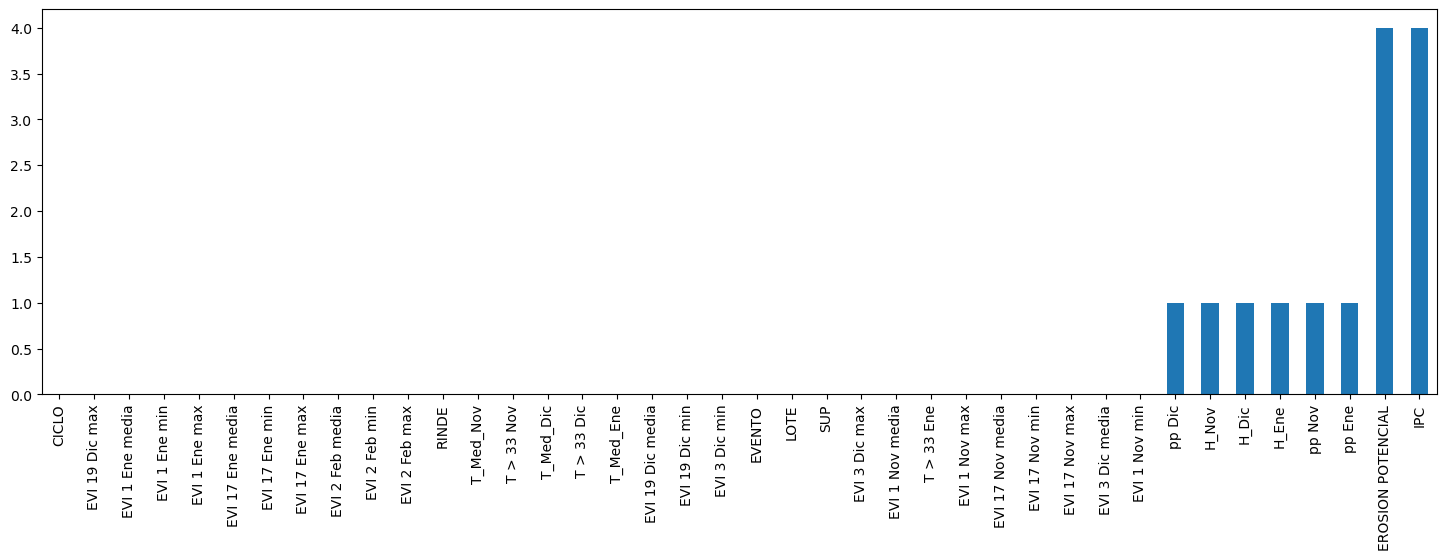

In [ ]:
# Contabilizar los valores NaN ordenarlos de menor a mayor
df.isnull().sum().sort_values().plot.bar(figsize=(18, 5))

## Rellenar los valores nulos de las variables

In [ ]:
# Reemplazar los valores NaN por la mediana de la columnas pp Dic, H_Nov, H_Dic, H_Ene, pp Nov, pp Ene
df["pp Dic"].fillna(df["pp Dic"].median(), inplace=True)
df["H_Nov"].fillna(df["H_Nov"].median(), inplace=True)
df["H_Dic"].fillna(df["H_Dic"].median(), inplace=True)
df["H_Ene"].fillna(df["H_Ene"].median(), inplace=True)
df["pp Nov"].fillna(df["pp Nov"].median(), inplace=True)
df["pp Ene"].fillna(df["pp Ene"].median(), inplace=True)


In [ ]:
# Reemplazar los valores NaN de la columna EROSION POTENCIAL por la moda
df["EROSION POTENCIAL"].fillna(df["EROSION POTENCIAL"].mode()[0], inplace=True)

In [ ]:
# Reemplazar los valores NaN de la columna IPC por la mediana
df["IPC"].fillna(df["IPC"].median(), inplace=True)


<AxesSubplot: >

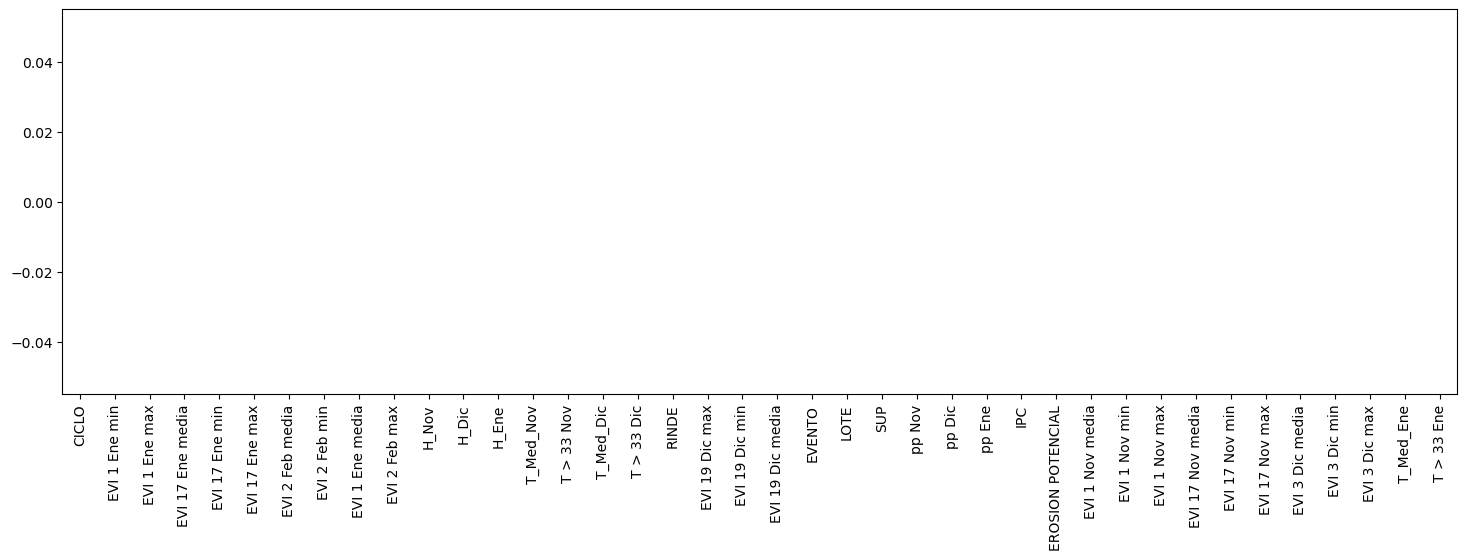

In [ ]:
# Chequear que no queden valores NaN
df.isnull().sum().sort_values().plot.bar(figsize=(18, 5))

In [ ]:
# Descripción estadística del las variables numericas
df.describe().round(1)


,SUP,EVI 1 Nov media,EVI 1 Nov min,EVI 1 Nov max,EVI 17 Nov media,EVI 17 Nov min,EVI 17 Nov max,EVI 3 Dic media,EVI 3 Dic min,EVI 3 Dic max,...,EVI 2 Feb media,EVI 2 Feb min,EVI 2 Feb max,RINDE,T_Med_Nov,T > 33 Nov,T_Med_Dic,T > 33 Dic,T_Med_Ene,T > 33 Ene
count,176.0,176.0,176.0,176.0,176.0,176.0,176.0,176.0,176.0,176.0,...,176.0,176.0,176.0,176.0,176.0,176.0,176.0,176.0,176.0,176.0
mean,84.7,0.4,0.3,0.4,0.5,0.4,0.6,0.6,0.6,0.7,...,0.3,0.3,0.4,7019.6,21.3,1.1,23.5,2.5,25.3,6.1
std,46.7,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,...,0.1,0.1,0.1,2468.1,1.1,2.0,1.0,3.0,0.6,3.9
min,8.5,0.2,0.2,0.2,0.2,0.0,0.2,0.3,0.2,0.3,...,0.2,0.1,0.2,390.0,20.3,0.0,21.7,0.0,24.2,0.0
25%,53.5,0.3,0.2,0.3,0.5,0.3,0.5,0.6,0.5,0.6,...,0.2,0.2,0.3,5610.2,20.5,0.0,22.7,0.0,25.1,2.0
50%,76.6,0.3,0.3,0.4,0.6,0.4,0.6,0.6,0.6,0.7,...,0.3,0.2,0.4,7278.0,20.9,0.0,23.5,3.0,25.2,5.0
75%,109.6,0.4,0.4,0.5,0.6,0.5,0.7,0.7,0.6,0.8,...,0.4,0.3,0.4,8678.8,21.8,1.0,24.1,3.0,25.8,9.0
max,264.1,0.7,0.6,0.8,0.8,0.7,0.8,0.9,0.9,0.9,...,0.5,0.5,0.7,13315.0,24.1,7.0,26.8,17.0,26.5,13.0


In [ ]:
# Descripcion de la variables categoricas
df.describe(include=["O"])

,CICLO,EVENTO,LOTE,pp Nov,pp Dic,pp Ene,IPC,EROSION POTENCIAL,H_Nov,H_Dic,H_Ene
count,176,176,176,176,176,176,176,176,176,176,176
unique,16,3,112,77,72,78,27,4,126,124,132
top,2005/06,Niña,1,55,164,202,50,moderadamente susceptible,1384,1169,1378
freq,20,77,4,13,13,13,44,84,4,5,4


In [ ]:
# Converitr las variables pp Nov, pp Dic, pp Ene, IPC, H_Nov, H_Dic, H_Ene,  a float
df["pp Nov"] = df["pp Nov"].astype(float)
df["pp Dic"] = df["pp Dic"].astype(float)
df["pp Ene"] = df["pp Ene"].astype(float)
df["IPC"] = df["IPC"].astype(float)
df["H_Nov"] = df["H_Nov"].astype(float)
df["H_Dic"] = df["H_Dic"].astype(float)
df["H_Ene"] = df["H_Ene"].astype(float)


In [ ]:
# Obtén la columna "RINDE"
rinde_column = df.pop("RINDE")
# Agrega la columna "RINDE" al final del DataFrame
df["RINDE"] = rinde_column
# Elimina las columnas "CICLO" y "LOTE"
df = df.drop([ "CICLO", "LOTE"], axis=1)
df

,EVENTO,SUP,pp Nov,pp Dic,pp Ene,IPC,EROSION POTENCIAL,EVI 1 Nov media,EVI 1 Nov min,EVI 1 Nov max,...,H_Nov,H_Dic,H_Ene,T_Med_Nov,T > 33 Nov,T_Med_Dic,T > 33 Dic,T_Med_Ene,T > 33 Ene,RINDE
0,Neutro,64.8,353.0,140.0,156.0,52.0,moderadamente susceptible,0.212712,0.2035,0.2397,...,1458.0,677.0,1064.0,20.4,0,22.9,0,24.5,6,6675
1,Neutro,118.4,353.0,140.0,156.0,34.0,practicamente no susceptible,0.509707,0.4630,0.6164,...,1463.0,696.0,1111.0,20.4,0,22.9,0,24.5,6,8357
2,Neutro,143.6,353.0,140.0,156.0,32.0,moderadamente susceptible,0.484929,0.4630,0.5108,...,1459.0,689.0,1093.0,20.4,0,22.9,0,24.5,6,7296
3,Neutro,143.1,358.0,136.0,120.0,32.0,moderadamente susceptible,0.327773,0.2531,0.4823,...,1455.0,689.0,1092.0,20.4,0,22.9,0,24.5,6,4668
4,Neutro,69.4,337.0,153.0,170.0,50.0,moderadamente susceptible,0.374044,0.2448,0.4344,...,1483.0,759.0,1239.0,20.4,0,22.9,0,24.5,6,5848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Niña,92.3,231.0,367.0,399.0,40.0,moderadamente susceptible,0.338064,0.3020,0.3869,...,783.0,1315.0,1483.0,20.8,0,24.5,5,25.1,1,6484
172,Niña,213.8,228.0,389.0,407.0,50.0,practicamente no susceptible,0.410230,0.3490,0.4725,...,770.0,1328.0,1480.0,20.8,0,24.5,5,25.1,1,8030
173,Niña,79.1,231.0,367.0,399.0,73.0,levemente susceptible,0.344189,0.3190,0.3784,...,783.0,1307.0,1490.0,20.8,0,24.5,5,25.1,1,6507
174,Niña,129.1,228.0,389.0,407.0,32.0,moderadamente susceptible,0.382760,0.3327,0.5227,...,779.0,1318.0,1482.0,20.8,0,24.5,5,25.1,1,7896


In [ ]:
# Contabilizar las categorias de la columna EVENTO
df.value_counts("EVENTO")

EVENTO
Niña      77
Niño      69
Neutro    30
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EVENTO             176 non-null    object 
 1   SUP                176 non-null    float64
 2   pp Nov             176 non-null    float64
 3   pp Dic             176 non-null    float64
 4   pp Ene             176 non-null    float64
 5   IPC                176 non-null    float64
 6   EROSION POTENCIAL  176 non-null    object 
 7   EVI 1 Nov media    176 non-null    float64
 8   EVI 1 Nov min      176 non-null    float64
 9   EVI 1 Nov max      176 non-null    float64
 10  EVI 17 Nov media   176 non-null    float64
 11  EVI 17 Nov min     176 non-null    float64
 12  EVI 17 Nov max     176 non-null    float64
 13  EVI 3 Dic media    176 non-null    float64
 14  EVI 3 Dic min      176 non-null    float64
 15  EVI 3 Dic max      176 non-null    float64
 16  EVI 19 Dic media   176 non

#  Gráficos 📈

## Histogramas de las variables numéricas

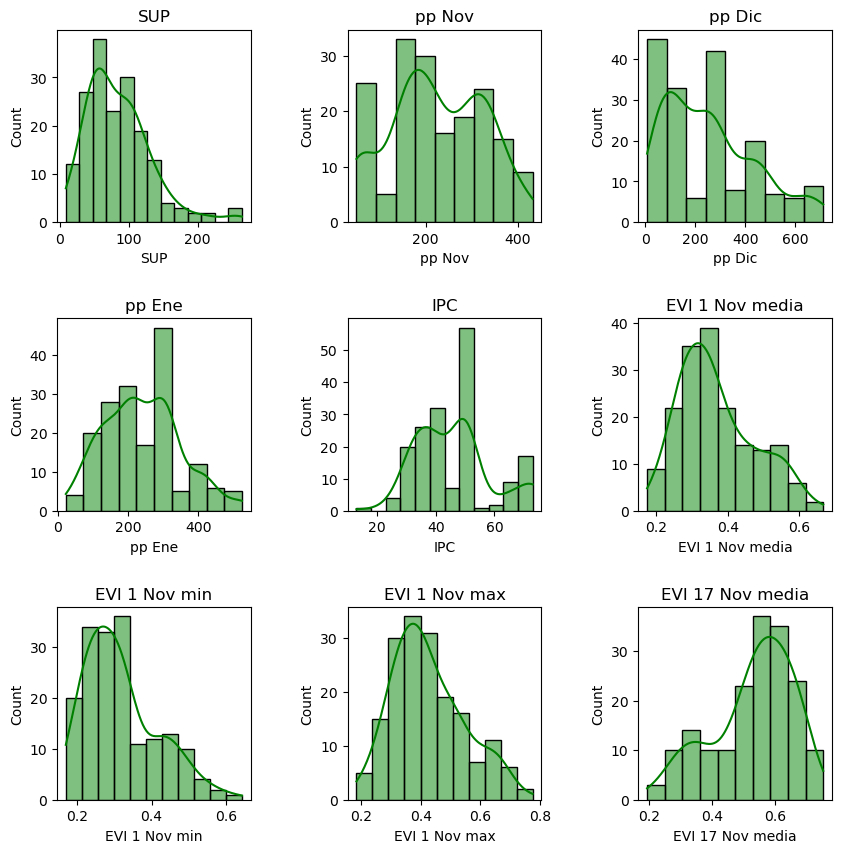

In [ ]:
# Graficar las variables numericas
import numpy as np
fig, ax = plt.subplots (3,3, figsize=(10,10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

variables_numericas = ["SUP", "pp Nov", "pp Dic", "pp Ene", "IPC", "EVI 1 Nov media", "EVI 1 Nov min", "EVI 1 Nov max", "EVI 17 Nov media"]

for i, variable in enumerate(variables_numericas):
    sns.histplot(df[variable], ax=ax[i//3, i%3], color="green", kde=True)
    ax[i//3, i%3].set_title(variable)

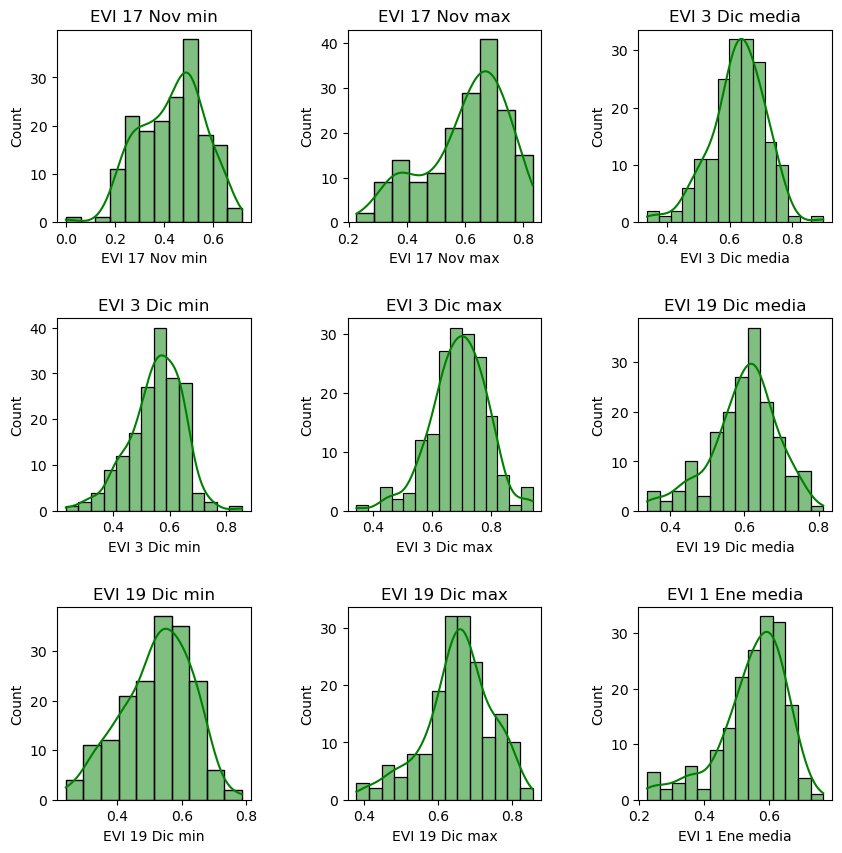

In [ ]:
fig, ax = plt.subplots (3,3, figsize=(10,10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

variables_numericas = ["EVI 17 Nov min", "EVI 17 Nov max", "EVI 3 Dic media", "EVI 3 Dic min", "EVI 3 Dic max", "EVI 19 Dic media", "EVI 19 Dic min", "EVI 19 Dic max", "EVI 1 Ene media"]

for i, variable in enumerate(variables_numericas):
    sns.histplot(df[variable], ax=ax[i//3, i%3], color="green", kde=True)
    ax[i//3, i%3].set_title(variable)

plt.show()

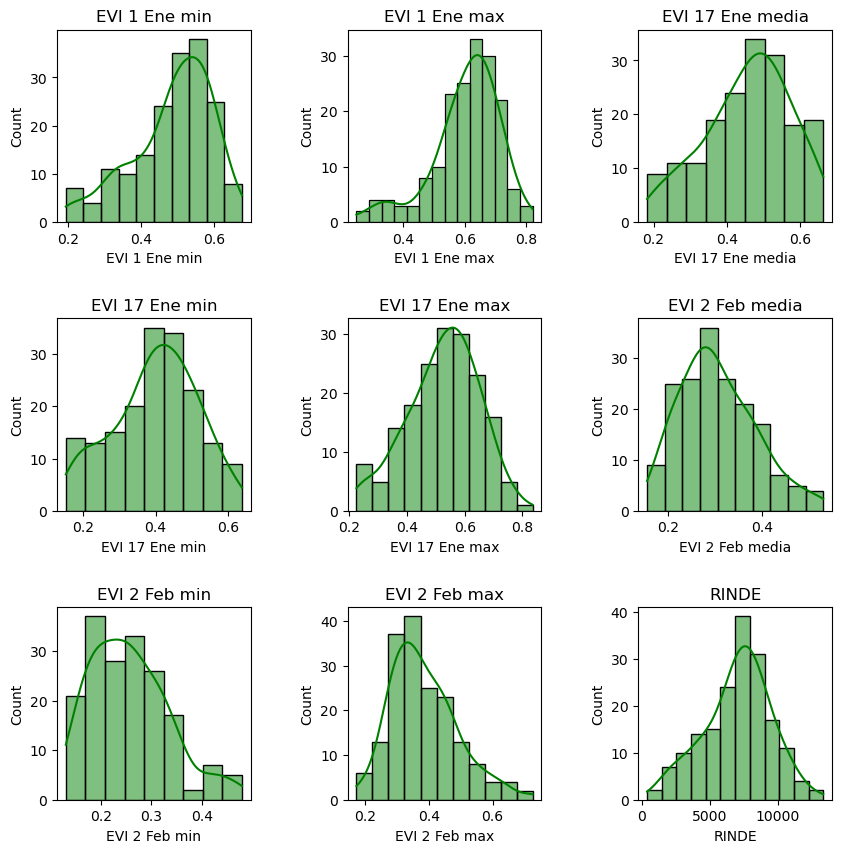

In [ ]:
fig, ax = plt.subplots (3,3, figsize=(10,10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

variables_numericas = ["EVI 1 Ene min", "EVI 1 Ene max", "EVI 17 Ene media", "EVI 17 Ene min", "EVI 17 Ene max", "EVI 2 Feb media", "EVI 2 Feb min", "EVI 2 Feb max", "RINDE"]

for i, variable in enumerate(variables_numericas):
    sns.histplot(df[variable], ax=ax[i//3, i%3], color="green", kde=True)
    ax[i//3, i%3].set_title(variable)

plt.show()

Los histogramas de rendimiento y el EVI de diciembre presentan una distribución normal, mientras que la precipitación de diciembre tiende a concentrarse hacia valores más bajos.

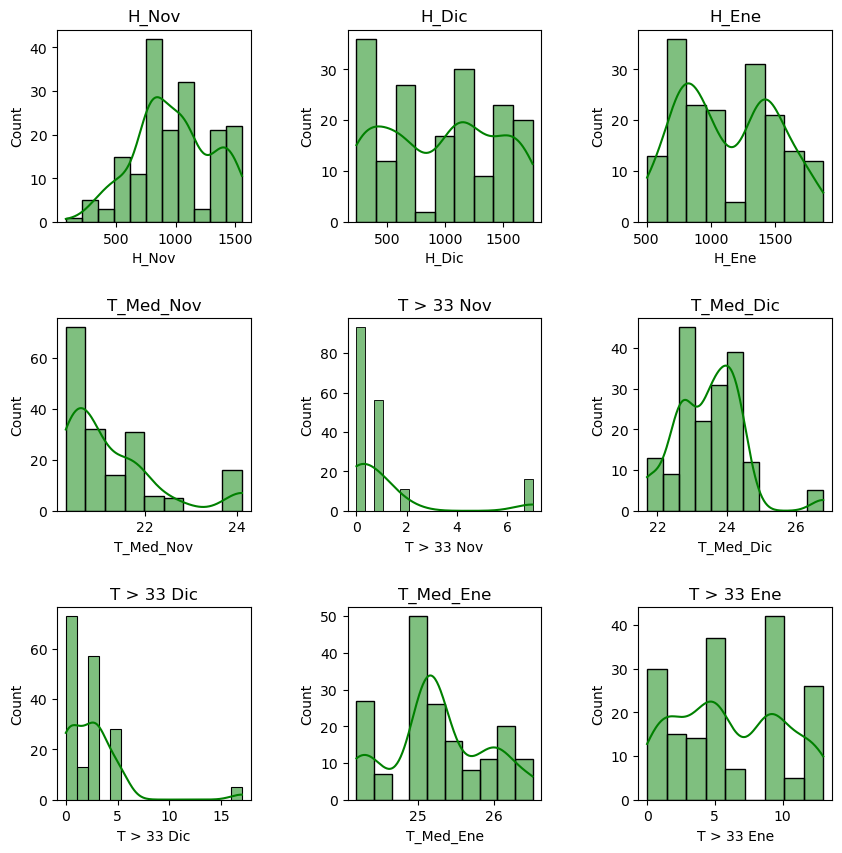

In [ ]:
fig, ax = plt.subplots (3,3, figsize=(10,10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

variables_numericas = ["H_Nov", "H_Dic", "H_Ene", "T_Med_Nov", "T > 33 Nov", "T_Med_Dic", "T > 33 Dic", "T_Med_Ene", "T > 33 Ene"]

for i, variable in enumerate(variables_numericas):
    sns.histplot(df[variable], ax=ax[i//3, i%3], color="green", kde=True)
    ax[i//3, i%3].set_title(variable)

plt.show()

## Graficas variables categóricas

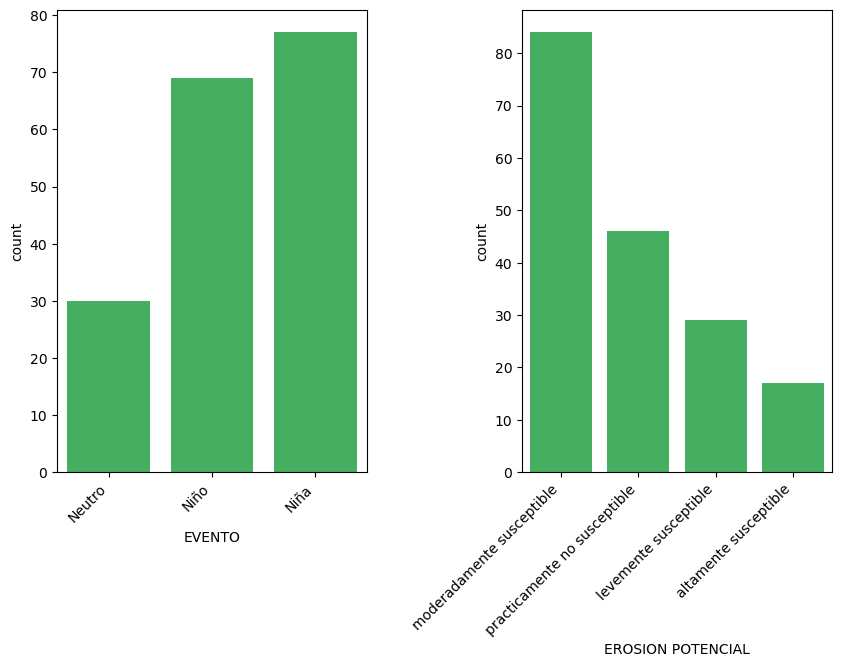

In [ ]:
# Graficar variables categoricas
fig, ax = plt.subplots (1, 2, figsize=(10, 6))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

variables_categoricas =[ "EVENTO", "EROSION POTENCIAL"]

for i, variable in enumerate(variables_categoricas[:2]):
    sns.countplot(x=variable, data=df, ax=ax[i], color="#34bf59")
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right')

plt.show()

### Análisis de valores atípicos

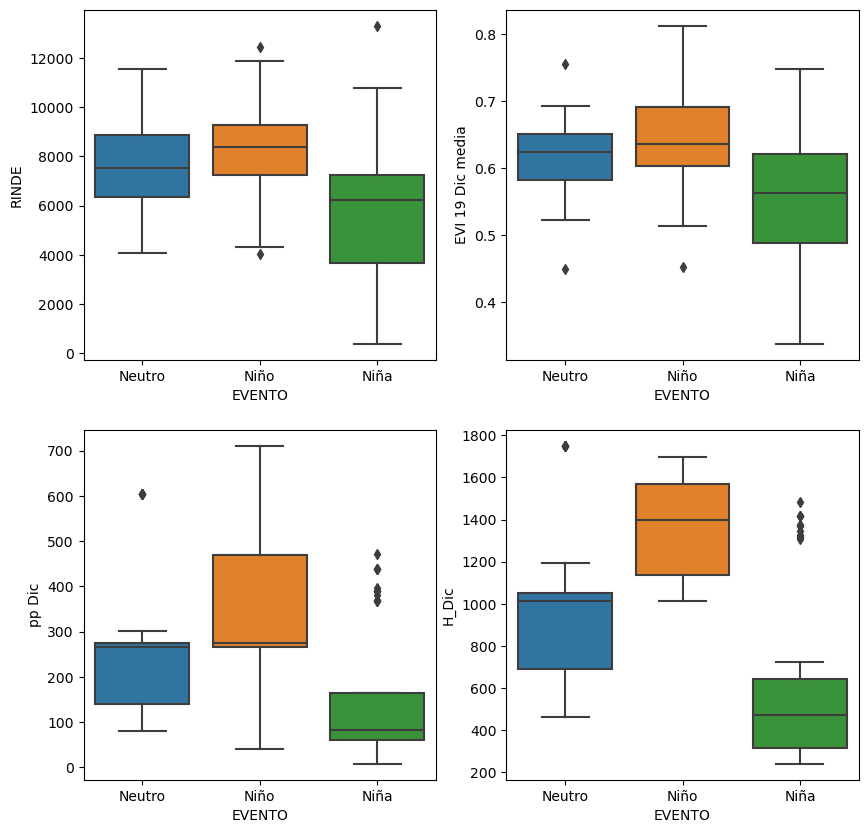

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

sns.boxplot(x="EVENTO", y="RINDE", data=df, ax=axes[0, 0])
sns.boxplot(x="EVENTO", y="EVI 19 Dic media", data=df, ax=axes[0, 1])
sns.boxplot(x="EVENTO", y="pp Dic", data=df, ax=axes[1, 0])
sns.boxplot(x="EVENTO", y="H_Dic", data=df, ax=axes[1, 1])

plt.show()

El periodo crítico del maíz de primera se ubica entre 15 días previos y 15 días posteriores a la floración. Por lo tanto, se analizaron algunas variables en este mes y los eventos climáticos.
La mediana de precipitación en el mes de diciembre más elevada se detecta en los eventos Niño, en contraposición, en los eventos Niña la mediana de precipitación es la más baja.

El valor máximo de la mediana del rendimiento se detectó en los años Niño, mientras que el valor más bajo de la mediana se registró en los años Niña.

En general, la distribución del rendimiento es normal o tiende a ser normal tanto en los tres eventos climáticos.
El NDVI de fecha 19/Dic presenta un comportamiento similar al observado en los plots evento y rendimiento. Con valores máximos de los plots que relacionan Evento y Rendimiento.

Por otra parte, la humedad del suelo en diciembre relacionado con el tipo de evento detalla que en los años Niño posee la media más elevada, en segundo lugar, se ubica los años Neutro y el valor más bajo se registra en los años Niña.

En conclusión:
Los eventos Niño poseen mayor precipitación, lo cual tiene una relación positiva con los cambios de humedad en el suelo y por ende en los valores de NDVI.

En los boxplots se pueden observar valores atípicos por encima de los valores normales, la presencia de estos valores es debido a la presencia de riego artificial en determinados lotes.

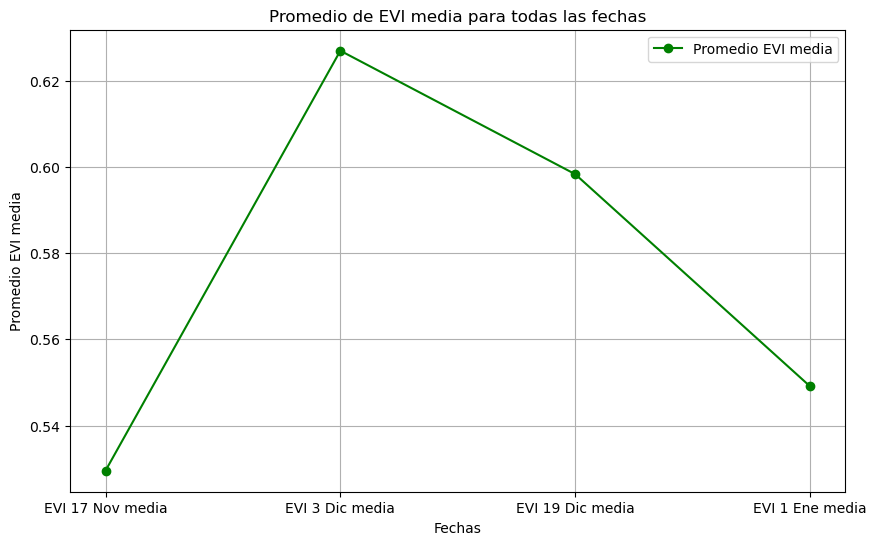

In [ ]:
# Selecciona las columnas de EVI media
evi_cols = ['EVI 17 Nov media', 'EVI 3 Dic media',
             'EVI 19 Dic media', 'EVI 1 Ene media']

# Calcula el promedio de EVI media para cada fecha
promedio_evi_media = df[evi_cols].mean()

# Genera el gráfico
plt.figure(figsize=(10, 6))

# Grafica la curva de promedio de EVI media
plt.plot(evi_cols, promedio_evi_media, marker='o', color='green', label='Promedio EVI media')

# Configura el gráfico
plt.xlabel('Fechas')
plt.ylabel('Promedio EVI media')
plt.title('Promedio de EVI media para todas las fechas')
plt.legend()
plt.grid(True)

# Muestra el gráfico
plt.show()


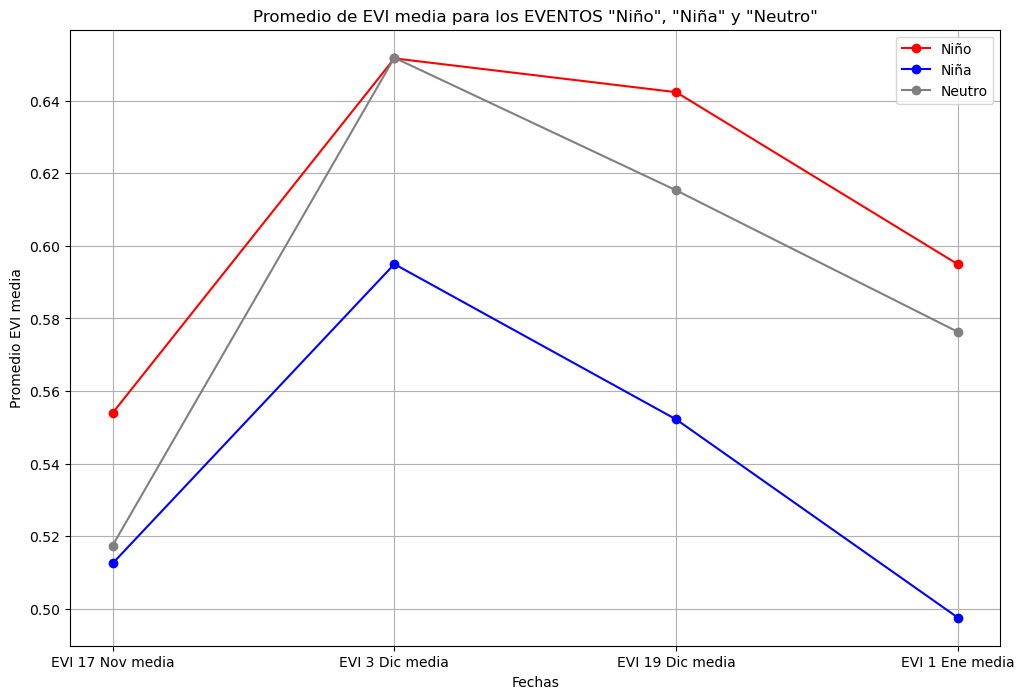

Área bajo la curva para Niño: 1.8684641345983855
Área bajo la curva para Niña: 1.6520989410495397
Área bajo la curva para Neutro: 1.8140022158212157


In [ ]:
from scipy.integrate import trapz

# Filtra los datos para los EVENTOS "Niño", "Niña" y "Neutro"
datos_nino = df[df['EVENTO'] == 'Niño']
datos_nina = df[df['EVENTO'] == 'Niña']
datos_neutro = df[df['EVENTO'] == 'Neutro']

# Selecciona las columnas de EVI media
evi_cols = ['EVI 17 Nov media', 'EVI 3 Dic media',
             'EVI 19 Dic media', 'EVI 1 Ene media']

# Calcula el promedio de EVI media para cada fecha para cada evento
promedio_evi_media_nino = datos_nino[evi_cols].mean()
promedio_evi_media_nina = datos_nina[evi_cols].mean()
promedio_evi_media_neutro = datos_neutro[evi_cols].mean()

# Calcula la integral (área bajo la curva) para cada evento
area_nino = trapz(promedio_evi_media_nino, dx=1)
area_nina = trapz(promedio_evi_media_nina, dx=1)
area_neutro = trapz(promedio_evi_media_neutro, dx=1)

# Genera el gráfico
plt.figure(figsize=(12, 8))

# Grafica las curvas de promedio de EVI media para cada evento
plt.plot(evi_cols, promedio_evi_media_nino, marker='o', color='red', label='Niño')
plt.plot(evi_cols, promedio_evi_media_nina, marker='o', color='blue', label='Niña')
plt.plot(evi_cols, promedio_evi_media_neutro, marker='o', color='grey', label='Neutro')

# Configura el gráfico
plt.xlabel('Fechas')
plt.ylabel('Promedio EVI media')
plt.title('Promedio de EVI media para los EVENTOS "Niño", "Niña" y "Neutro"')
plt.legend()
plt.grid(True)

# Muestra el gráfico y las áreas calculadas
plt.show()

# Muestra las áreas bajo la curva para cada evento
print('Área bajo la curva para Niño:', area_nino)
print('Área bajo la curva para Niña:', area_nina)
print('Área bajo la curva para Neutro:', area_neutro)

Se graficaron las curvas de EVI entre las fechas 17/Nov al 01/Ene para los tres tipos de Evento.
Los picos máximos se ubicaron para fecha 03/Dic en los tres eventos pero con las siguientes diferencias:
* Niño: luego de alcanzar el pico el descenso es más suave lo que demuestra un lento secado del cultivo asociado al incremento de las precipitaciones.
* Neutro: posee el mismo valor de pico pero el descenso posterior es más marcado.
* Niña: El pico es el más bajo y además el descenso es bastante marcado.

Estas curvas generan un área donde el mayor valor lo presenta el evento Niño y el menor la Niña.

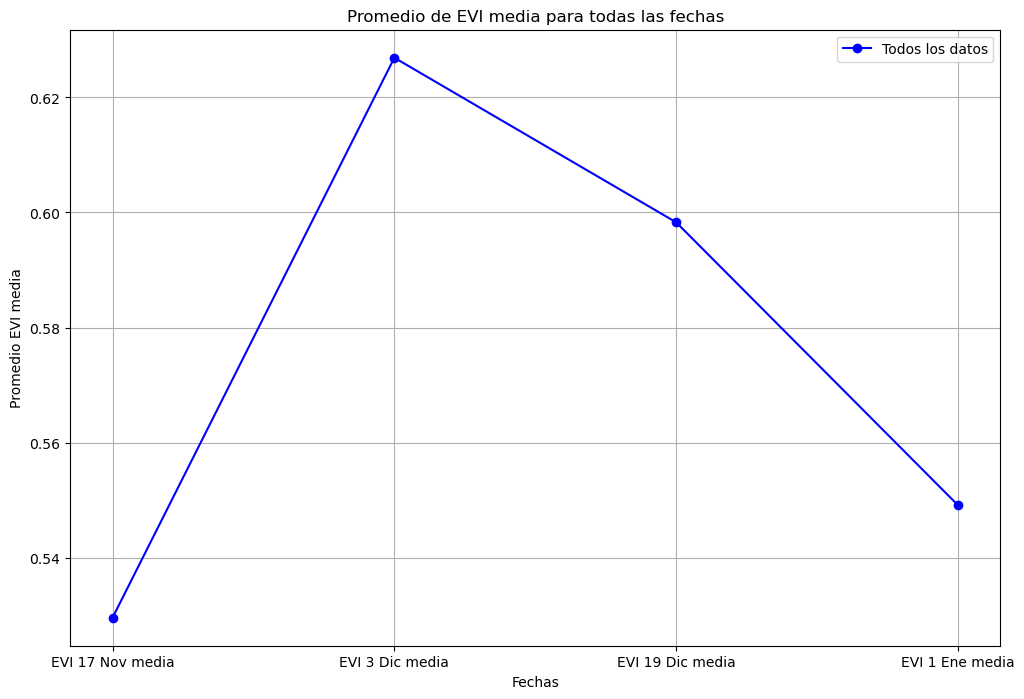

Área bajo la curva para todos los datos: 1.7645210808110208


In [ ]:

# Selecciona las columnas de EVI media para todas las fechas
evi_cols_all = ['EVI 17 Nov media', 'EVI 3 Dic media',
    'EVI 19 Dic media', 'EVI 1 Ene media']

# Calcula el promedio de EVI media para cada fecha
promedio_evi_media_all = df[evi_cols_all].mean()

# Calcula la integral (área bajo la curva) para todos los datos
area_all = trapz(promedio_evi_media_all, dx=1)

# Genera el gráfico
plt.figure(figsize=(12, 8))

# Grafica la curva de promedio de EVI media para todos los datos
plt.plot(evi_cols_all, promedio_evi_media_all, marker='o', color='blue', label='Todos los datos')

# Configura el gráfico
plt.xlabel('Fechas')
plt.ylabel('Promedio EVI media')
plt.title('Promedio de EVI media para todas las fechas')
plt.legend()
plt.grid(True)

# Muestra el gráfico y el área calculada
plt.show()

# Muestra el área bajo la curva para todos los datos
print('Área bajo la curva para todos los datos:', area_all)

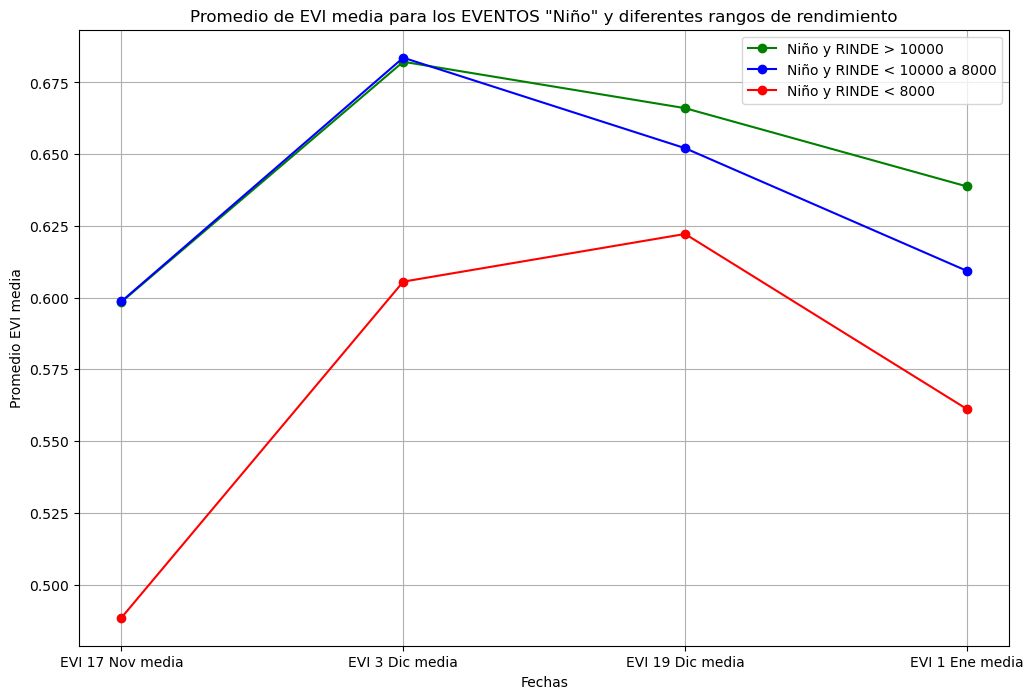

Área bajo la curva para Niño y RINDE > 10000: 1.966827919071669
Área bajo la curva para Niño y RINDE < 10000 a 8000: 1.9396743124231124
Área bajo la curva para Niño y RINDE < 8000: 1.7525548285056547


In [ ]:
# Filtrar los datos para los EVENTOS "Niño"
df_nino = df[df['EVENTO'] == 'Niño']

# Filtrar los datos para los diferentes rangos de rendimiento
df_nino_gt_10000 = df_nino[df_nino['RINDE'] > 10000]
df_nino_lt_10000_8000 = df_nino[(df_nino['RINDE'] < 10000) & (df_nino['RINDE'] >= 8000)]
df_nino_lt_8000 = df_nino[df_nino['RINDE'] < 8000]

# Seleccionar las columnas de EVI media
evi_cols = ['EVI 17 Nov media', 'EVI 3 Dic media', 'EVI 19 Dic media', 'EVI 1 Ene media']

# Calcular el promedio de EVI media para cada fecha para cada grupo de rendimiento
promedio_evi_media_nino_gt_10000 = df_nino_gt_10000[evi_cols].mean()
promedio_evi_media_nino_lt_10000_8000 = df_nino_lt_10000_8000[evi_cols].mean()
promedio_evi_media_nino_lt_8000 = df_nino_lt_8000[evi_cols].mean()

# Calcular el área bajo la curva para cada grupo de rendimiento
area_nino_gt_10000 = trapz(promedio_evi_media_nino_gt_10000, dx=1)
area_nino_lt_10000_8000 = trapz(promedio_evi_media_nino_lt_10000_8000, dx=1)
area_nino_lt_8000 = trapz(promedio_evi_media_nino_lt_8000, dx=1)

# Generar el gráfico
plt.figure(figsize=(12, 8))

# Graficar las curvas de promedio de EVI media para cada grupo de rendimiento
plt.plot(evi_cols, promedio_evi_media_nino_gt_10000, marker='o', color='green', label='Niño y RINDE > 10000')
plt.plot(evi_cols, promedio_evi_media_nino_lt_10000_8000, marker='o', color='blue', label='Niño y RINDE < 10000 a 8000')
plt.plot(evi_cols, promedio_evi_media_nino_lt_8000, marker='o', color='red', label='Niño y RINDE < 8000')

# Configurar el gráfico
plt.xlabel('Fechas')
plt.ylabel('Promedio EVI media')
plt.title('Promedio de EVI media para los EVENTOS "Niño" y diferentes rangos de rendimiento')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

# Mostrar el área bajo la curva para cada grupo de rendimiento
print('Área bajo la curva para Niño y RINDE > 10000:', area_nino_gt_10000)
print('Área bajo la curva para Niño y RINDE < 10000 a 8000:', area_nino_lt_10000_8000)
print('Área bajo la curva para Niño y RINDE < 8000:', area_nino_lt_8000)

Específicamente para el evento Niño se generaron tres curvas que muestran tres rangos de rendimiento:

* Rinde mayor a 10.000 kg/ha, posee el máximo pico y un descenso gradual.
* Rinde entre 8.000 a 10.000 kg/ha, posee un pico levemente mayor pero luego el descenso es de mayor pendiente.
* Rinde menor a 8.000 kg/ha, el pico es inferior al resto y se traslada a la fecha 19/Dic y con un posterior descenso marcado.

El área bajo la curva de estos tres rangos respeta el orden de los rangos de rendimiento.

## Optimización de variables:

Debido a que se cuenta con columnas de datos sumamente parecidas como las de los valores de índice EVI mínimo medio y máximo para 2 fechas puntuales en un mes, se optó por agrupar estos tipos de columnas para que solo quede 1 columna de índice EVI medio, mínimo y máximo por mes.

In [ ]:
# Unificar columnas de EVI  para cada mes
# Columnas para EVI media y EVI min/max de cada mes
columns_to_average = [
    'EVI 1 Nov media', 'EVI 17 Nov media',
    'EVI 3 Dic media', 'EVI 19 Dic media',
    'EVI 1 Ene media', 'EVI 17 Ene media',
    'EVI 2 Feb media']

columns_to_min_max = [
    'EVI 1 Nov min', 'EVI 17 Nov min',
    'EVI 1 Nov max', 'EVI 17 Nov max',
    'EVI 3 Dic min', 'EVI 19 Dic min',
    'EVI 3 Dic max', 'EVI 19 Dic max',
    'EVI 1 Ene min', 'EVI 17 Ene min',
    'EVI 1 Ene max', 'EVI 17 Ene max',
    'EVI 2 Feb min', 'EVI 2 Feb max'
]

# Crea nuevos DataFrames para EVI media y EVI min/max
df_monthly_media = df[columns_to_average]
df_monthly_min_max = df[columns_to_min_max]

# Calcula los promedios para EVI media
df['EVI Nov mean'] = df_monthly_media[['EVI 1 Nov media', 'EVI 17 Nov media']].mean(axis=1)
df['EVI Dic mean'] = df_monthly_media['EVI 3 Dic media']
df['EVI Ene mean'] = df_monthly_media[['EVI 1 Ene media', 'EVI 17 Ene media']].mean(axis=1)
df['EVI Feb mean'] = df_monthly_media['EVI 2 Feb media']

# Calcula los promedios para EVI min/max
df['EVI Nov min'] = df_monthly_min_max[['EVI 1 Nov min', 'EVI 17 Nov min']].mean(axis=1)
df['EVI Nov max'] = df_monthly_min_max[['EVI 1 Nov max', 'EVI 17 Nov max']].mean(axis=1)
df['EVI Dic min'] = df_monthly_min_max[['EVI 3 Dic min', 'EVI 19 Dic min']].mean(axis=1)
df['EVI Dic max'] = df_monthly_min_max[['EVI 3 Dic max', 'EVI 19 Dic max']].mean(axis=1)
df['EVI Ene min'] = df_monthly_min_max[['EVI 1 Ene min', 'EVI 17 Ene min']].mean(axis=1)
df['EVI Ene max'] = df_monthly_min_max[['EVI 1 Ene max', 'EVI 17 Ene max']].mean(axis=1)
df['EVI Feb min'] = df_monthly_min_max[['EVI 2 Feb min']].copy()
df['EVI Feb max'] = df_monthly_min_max[['EVI 2 Feb max']].copy()

# Elimina las columnas originales de EVI media y EVI min/max
df.drop(columns=columns_to_average + columns_to_min_max, inplace=True)

Se realizaron gráficos de tipo scatter para cada una de las característcas vs el target "Rinde", la intención es conocer cómo se relaciona cada variable con los datos a predecir. De esta manera obtenemos intuiciones visuales sobre aquellas variables que tienen cierta tendencia ya sea lineal o polinómica y aquellas variables que no poseen ningún patrón específico respecto a la variable a predecir. Además, se agregó la dimensión del fenomeno Niño, Niña o Neutro para obtener también intuiciones sobre esta varible según el comportamiento de las demas.

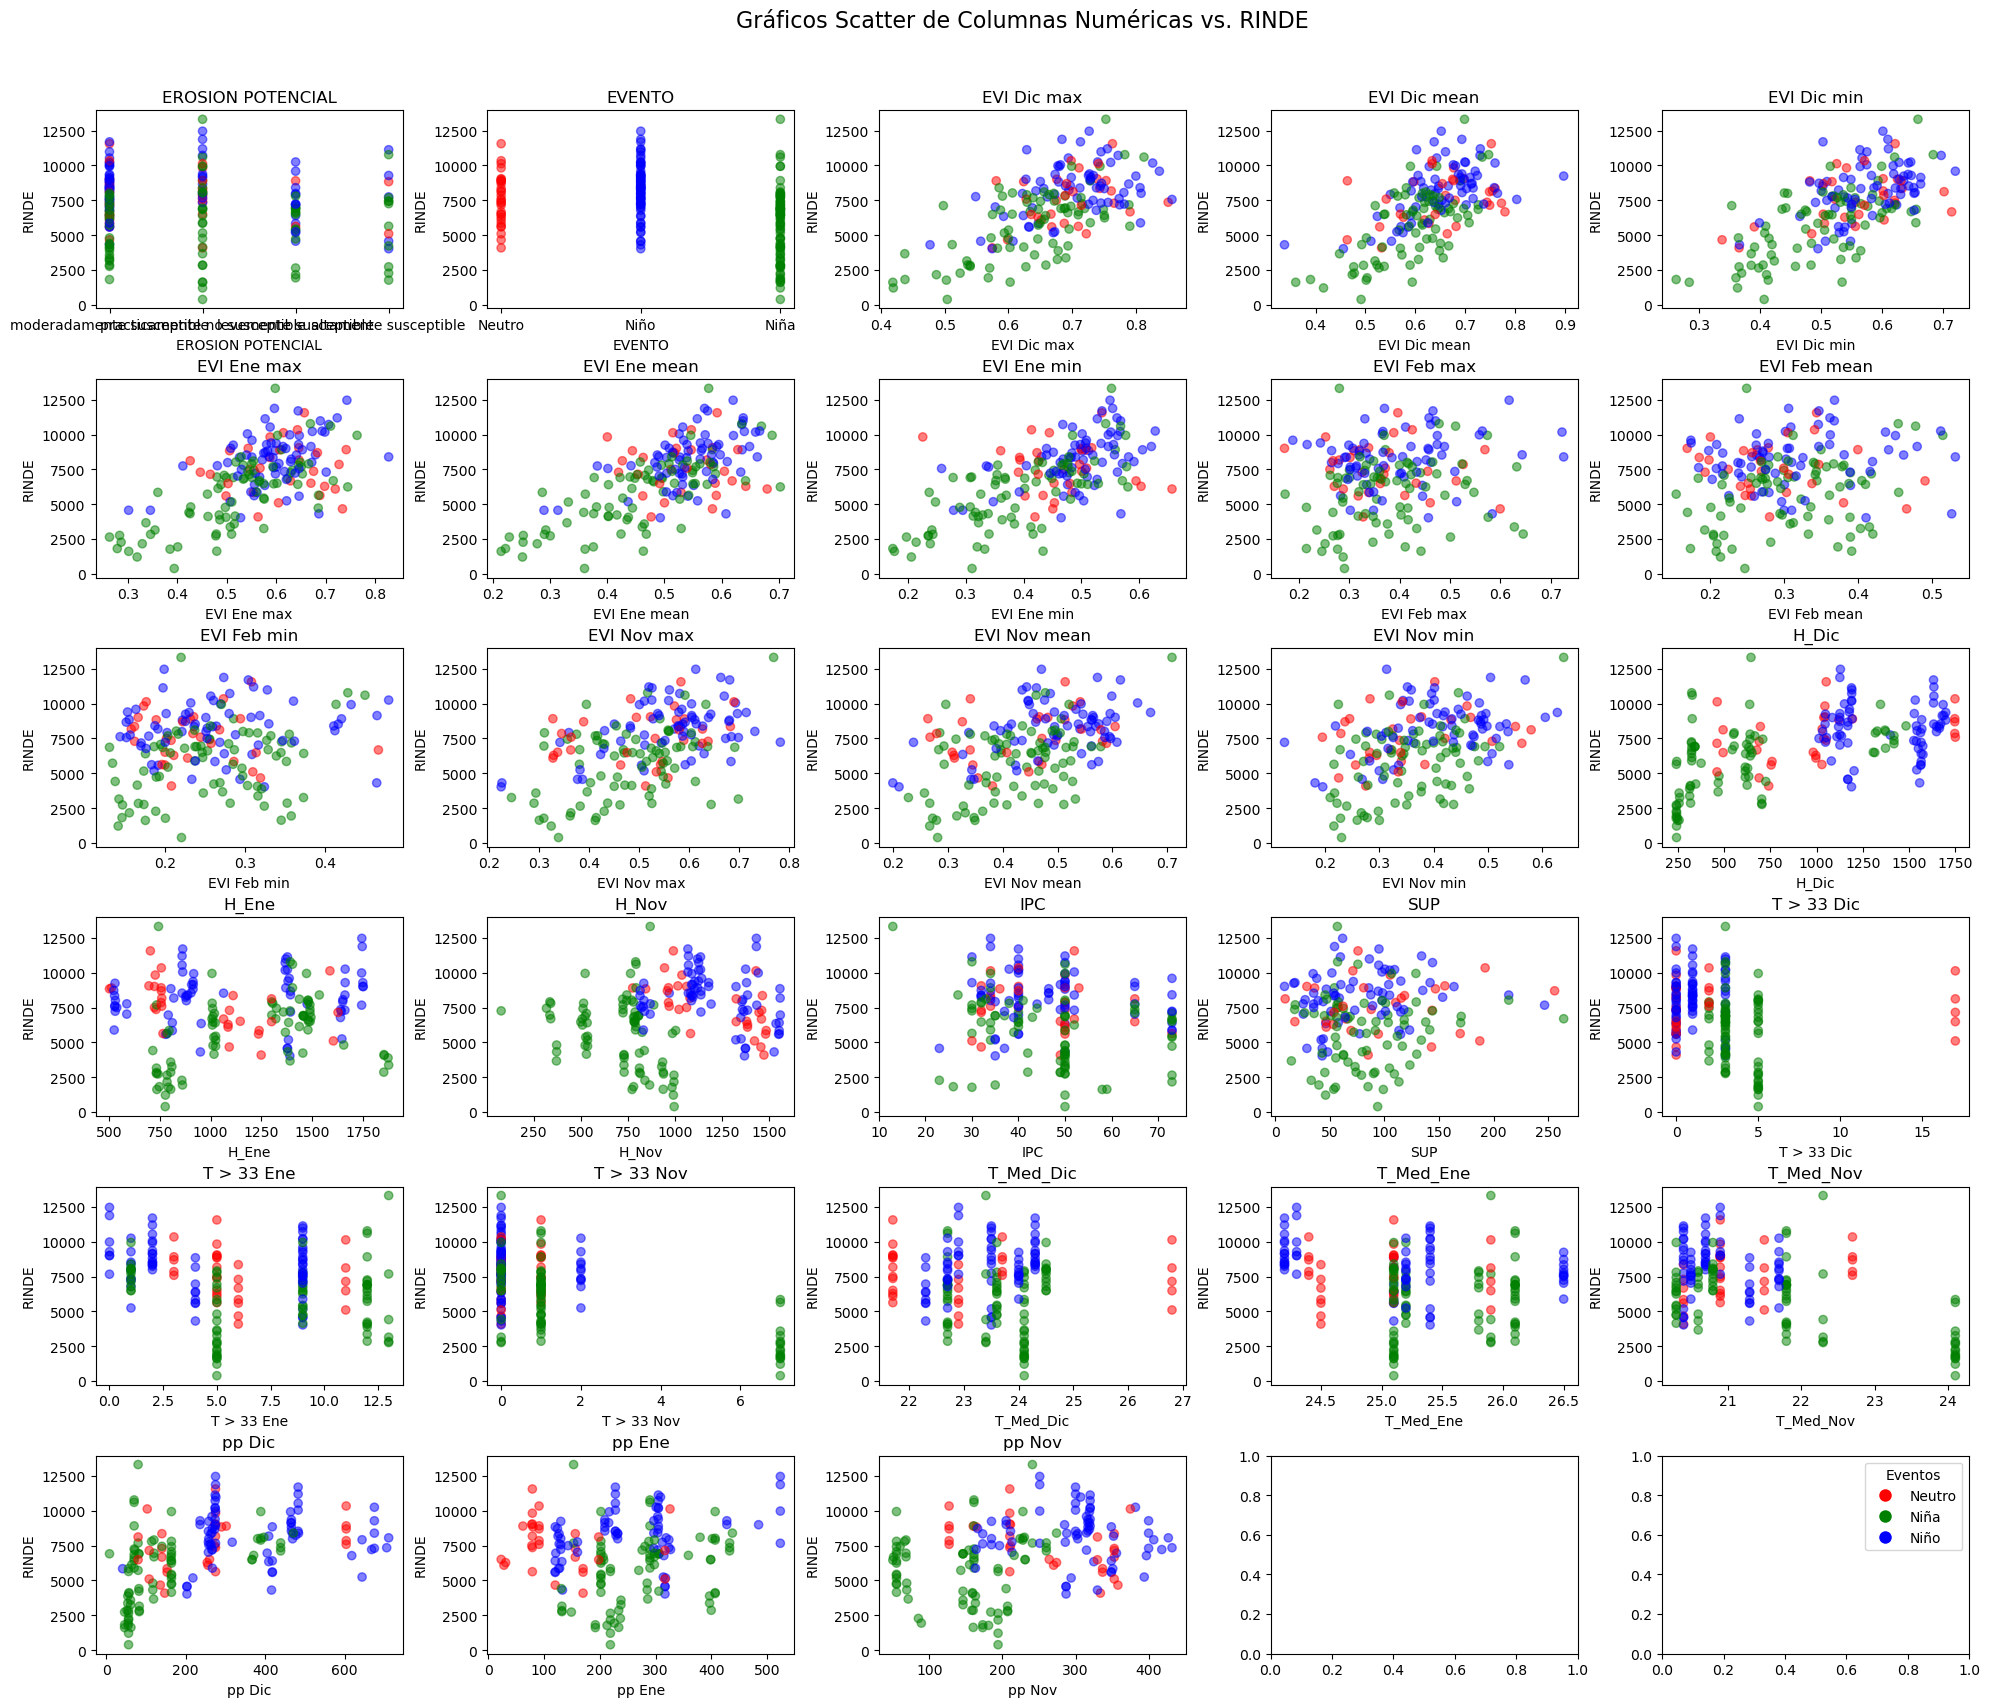

In [ ]:
columnas_numericas = df.columns.difference(['RINDE'])

num_filas = 6  # Cambia esto según tus preferencias
num_columnas = 5  # Cambia esto según tus preferencias

# Mapeo de colores para los eventos
colores_evento = {'Neutro': 'red', 'Niña': 'green', 'Niño': 'blue'}

# Crea un nuevo plot
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(20, 18))
fig.tight_layout(pad=3.0, rect=[0, 0.03, 1, 0.95])  # Ajusta el espaciado entre los gráficos

# Itera a través de las columnas numéricas y crea los gráficos scatter
for i, columna in enumerate(columnas_numericas):
    fila = i // num_columnas
    columna_actual = i % num_columnas
    evento = df['EVENTO']  # Suponiendo que la columna se llama 'EVENTO'
    colores = [colores_evento[e] for e in evento]  # Asigna colores según el evento
    axs[fila, columna_actual].scatter(df[columna], df['RINDE'], alpha=0.5, c=colores)
    axs[fila, columna_actual].set_title(columna)
    axs[fila, columna_actual].set_xlabel(columna)
    axs[fila, columna_actual].set_ylabel('RINDE')

# Crea una barra de color (leyenda) para los eventos
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colores_evento[evento], markersize=10, label=evento) for evento in colores_evento.keys()]
plt.legend(handles=handles, title='Eventos', loc='upper right')

# Añade un título general al gran plot
plt.suptitle("Gráficos Scatter de Columnas Numéricas vs. RINDE", fontsize=16)

# Muestra el plot
plt.show()

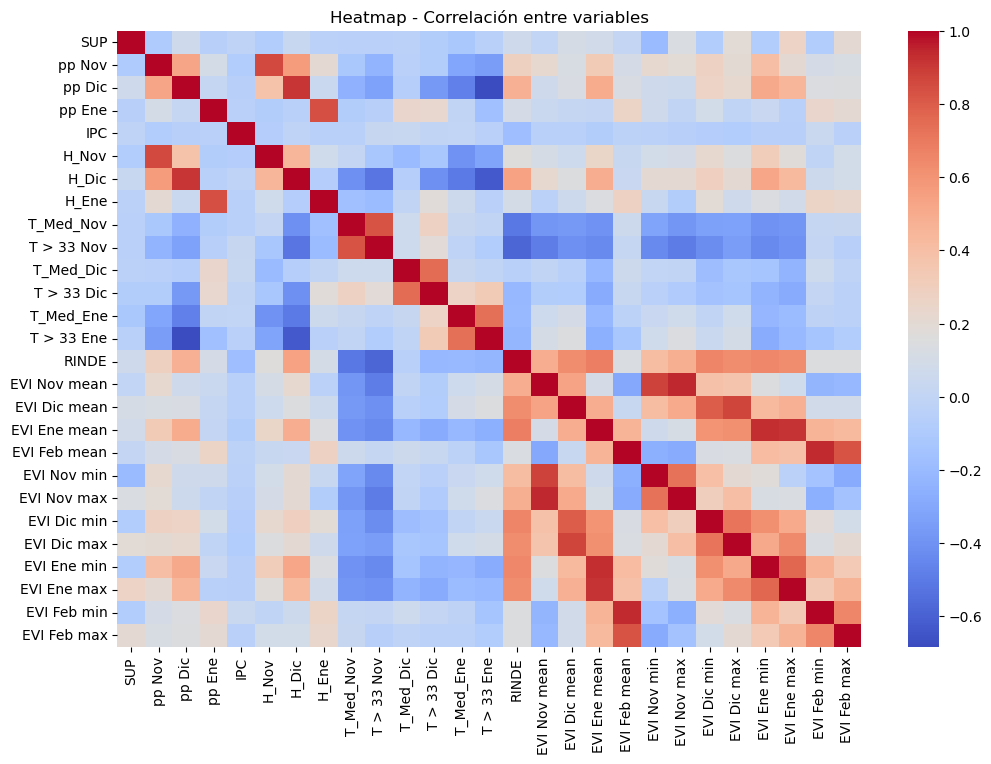

In [ ]:
# Generar la matriz de correlación
corr_matrix = df.corr(numeric_only=True)

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Heatmap - Correlación entre variables')
plt.show()

# Selección de características

In [ ]:
print(df.columns)

Index(['EVENTO', 'SUP', 'pp Nov', 'pp Dic', 'pp Ene', 'IPC',
       'EROSION POTENCIAL', 'H_Nov', 'H_Dic', 'H_Ene', 'T_Med_Nov',
       'T > 33 Nov', 'T_Med_Dic', 'T > 33 Dic', 'T_Med_Ene', 'T > 33 Ene',
       'RINDE', 'EVI Nov mean', 'EVI Dic mean', 'EVI Ene mean', 'EVI Feb mean',
       'EVI Nov min', 'EVI Nov max', 'EVI Dic min', 'EVI Dic max',
       'EVI Ene min', 'EVI Ene max', 'EVI Feb min', 'EVI Feb max'],
      dtype='object')


A partir de las intuiciones obtenidas en el apartado de análisis gráfico de los datos se creó un nuevo dataframe reducido con las características más idóneas para generar modelos óptimos.

In [ ]:
# Seleccionar las columnas que deseas incluir en el nuevo DataFrame
columnas_seleccionadas = ['EVENTO','EVI Nov mean','EVI Dic mean', 'EVI Ene mean', 'EVI Nov min',
       'EVI Nov max', 'EVI Dic min', 'EVI Dic max', 'EVI Ene min',
       'EVI Ene max','H_Nov', 'H_Dic', 'H_Ene','RINDE']

# Crear un nuevo DataFrame con las columnas seleccionadas
df_reduc = df[columnas_seleccionadas]

# División del conjunto de datos

Para el caso de estudio se optó por la estrategia de dividir el conjunto de datos en train y test, esto se hizo con la libreria sklearn, particularmente con el módulo de train_test_split. Se decidió dejar un 30% de los datos para test y por lo tanto un 70% de los mismos fueron utilizados en el entrenamiento de los diferentes modelos.

In [ ]:
X = df_reduc.drop(columns=['RINDE'])
y = df_reduc['RINDE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convierte los arrays de NumPy a DataFrames
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [ ]:
X_train

,EVENTO,EVI Nov mean,EVI Dic mean,EVI Ene mean,EVI Nov min,EVI Nov max,EVI Dic min,EVI Dic max,EVI Ene min,EVI Ene max,H_Nov,H_Dic,H_Ene
152,Niño,0.605450,0.639700,0.508400,0.60545,0.60545,0.62755,0.62755,0.50840,0.50840,1178.0,1126.0,1749.0
128,Niña,0.369982,0.501857,0.381200,0.30915,0.42300,0.36440,0.57270,0.30795,0.42740,372.0,472.0,1655.0
104,Niña,0.347645,0.389650,0.222155,0.27795,0.41365,0.26235,0.43745,0.17415,0.27890,780.0,246.0,748.0
78,Niño,0.512256,0.709833,0.648856,0.48810,0.53940,0.66315,0.72970,0.62095,0.67045,1087.0,1680.0,915.0
36,Niño,0.478150,0.689456,0.635822,0.43365,0.52755,0.63520,0.72830,0.60560,0.65305,1119.0,1192.0,1370.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Niño,0.646375,0.676300,0.525840,0.48420,0.69230,0.57470,0.68175,0.50135,0.54200,1068.0,1633.0,863.0
106,Niña,0.315925,0.503300,0.375742,0.27210,0.36140,0.36035,0.56835,0.31990,0.40110,865.0,241.0,862.0
14,Niño,0.326800,0.523767,0.550950,0.24695,0.42245,0.46500,0.59235,0.52250,0.57705,1535.0,1576.0,954.0
92,Niña,0.424217,0.602950,0.402156,0.34520,0.50170,0.50670,0.65840,0.35100,0.48840,534.0,616.0,1023.0


#  Preprocesamiento

Para el preprocesamiento se utilizó un enfoque de Programación Orientada a Objetos (POO). Este enfoque permite una mayor legibilidad y escalabilidad del código a la vez que permite ahorrar pasos y líneas del mismo. Otra de las grandes ventajas radica en su reutilización.
La lógica general de esta metodología es crear objetos que tomen como argumentos a los dataframes y devuelvan estos mismos luego de aplicar un proceso de dummificación escalado, normalizado, etc.


## Dummificación

Este paso del preprocesamiento crea una clase capaz de generar objetos de tipo "CustomOneHotEncoding", los cuales toman como argumento a un DataFrame
y a las columnas seleccionadas para la transformación dando como resultado a un nuevo dataframe con las columnas dummificadas utilizando el método de sklearn OneHotEncoder.

In [ ]:
class CustomOneHotEncoding(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_encode):
        self.columns_to_encode = columns_to_encode
        self._oh = OneHotEncoder(sparse=False)
        self._columns = None

    def fit(self, X, y=None):
        X_cat = X[self.columns_to_encode]
        self._columns = pd.get_dummies(X_cat).columns
        self._oh.fit(X_cat)
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        X_cat = X_copy[self.columns_to_encode]
        X_num = X_copy.drop(self.columns_to_encode, axis=1)
        X_cat_oh = self._oh.transform(X_cat)
        X_cat_oh = pd.DataFrame(X_cat_oh,
                                columns=self._columns,
                                index=X_copy.index)
        X_copy = X_num.join(X_cat_oh)
        return X_copy

In [ ]:
columns_to_encode = ['EVENTO']

custom_encoder = CustomOneHotEncoding(columns_to_encode)

X_train_dum = custom_encoder.fit_transform(X_train)
X_test_dum = custom_encoder.fit_transform(X_test)

c:\Users\Usuario\anaconda3\envs\PRUEBAKAGGEL\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Usuario\anaconda3\envs\PRUEBAKAGGEL\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Escalado
En este paso del preprocesamiento tomamos el dataframe previamente dummificado, instanciamos un objeto CustomScaler y lo pasamos como argumento del mismo. Esto devolverá un nuevo dataframe con todas las columnas escaladas según el método RobustScaler de sklearn.

In [ ]:
class CustomScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        self.robust_scaler = RobustScaler()
        self.robust_scaler.fit(X)
        return self

    def transform(self, X, y=None):
        X_scaled = self.robust_scaler.transform(X)
        X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
        return X_scaled_df

In [ ]:
custom_scaler = CustomScaler()

X_train_pro = custom_scaler.fit_transform(X_train_dum)
X_test_pro = custom_scaler.fit_transform(X_test_dum)

# Modelado

Una vez disponemos del dataframe preprocesado podemos comenzar a implementar diferentes tipos de modelos con el fin de compararlos entre si y medir su eficiencia a la hora de hacer predicciones.

## Métricas utilizadas para medir la eficiencia de los modelos:
* El primer modelo que se implemento es el más sencillo de todos, la regresión lineal, este modelo genera la recta que mejor pueda explicar el comportamiento de los datos, es decir aquella que minimice el error cuadrático medio entre los valores reales y los valores predichos. Para su implementación se utilizó de la librería sklearn el módulo LinearRegresion.
Error Cuadrático Medio (MSE - Mean Squared Error): El Error Cuadrático Medio es una métrica que mide la cantidad promedio por la cual los valores predichos de un modelo de regresión se desvían de los valores reales. Para calcularlo, se toma la diferencia entre las predicciones del modelo y los valores reales, se eleva al cuadrado cada una de estas diferencias, se promedian todos los cuadrados y se obtiene la raíz cuadrada del resultado. Cuanto más cercano a cero, mejor es el modelo.
* Error Absoluto Medio (MAE - Mean Absolute Error): El Error Absoluto Medio mide el valor absoluto promedio de las diferencias entre las predicciones del modelo y los valores reales. A diferencia del MSE, no eleva al cuadrado las diferencias. Mide la magnitud promedio de los errores.
* Coeficiente de Determinación (R2- R-squared): El coeficiente de determinación, comúnmente conocido como R2, es una métrica que proporciona información sobre cuánta varianza en la variable dependiente (la que se está prediciendo) es explicada por el modelo de regresión. R2 tiene un valor entre 0 y 1, y cuanto más cerca esté de 1, mejor es el ajuste del modelo a los datos. En otras palabras, R2 mide cuánta de la variabilidad en los datos es "capturada" por el modelo.




## *Regresion Lineal*

El primer modelo que se implementó es el más sencillo de todos, la regresión lineal, este modelo genera la recta que mejor pueda explicar el comportamiento de los datos, es decir aquella que minimice el error cuadrático medio entre los valores reales y los valores predichos. Para su implementación se utilizó de la librería sklearn el módulo LinearRegresion.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Ajusta el modelo de regresión lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train_pro, y_train)

# Predice los valores en el conjunto de prueba
y_pred = lin_reg.predict(X_test_pro)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Error absoluto medio (MSE): {mae}")
print(f"Coeficiente de determinación (R^2): {r2}")

Error cuadrático medio (MSE): 1951420.7378418946
Error absoluto medio (MSE): 1055.4890116345057
Coeficiente de determinación (R^2): 0.6014121250687933


**Resultados del modelo:**
Como se puede observar el modelo ajusta una recta con un r2 de 0.60, y un error absoluto medio de 1055 kilos lo cual a los fines de este trabajo no resulta muy eficientes.

# *Graficos extra:*
Se generaron rectas de regresión lineal para cada una de las columnas originales con respecto a la columna de rinde, esto fue con motivo de intentar entender como cada variable se está comportando a la hora de hacer predicciones. Observamos que en norma general las columnas de índice EVI tienen a ajustar rectas mejores que las demás columnas.

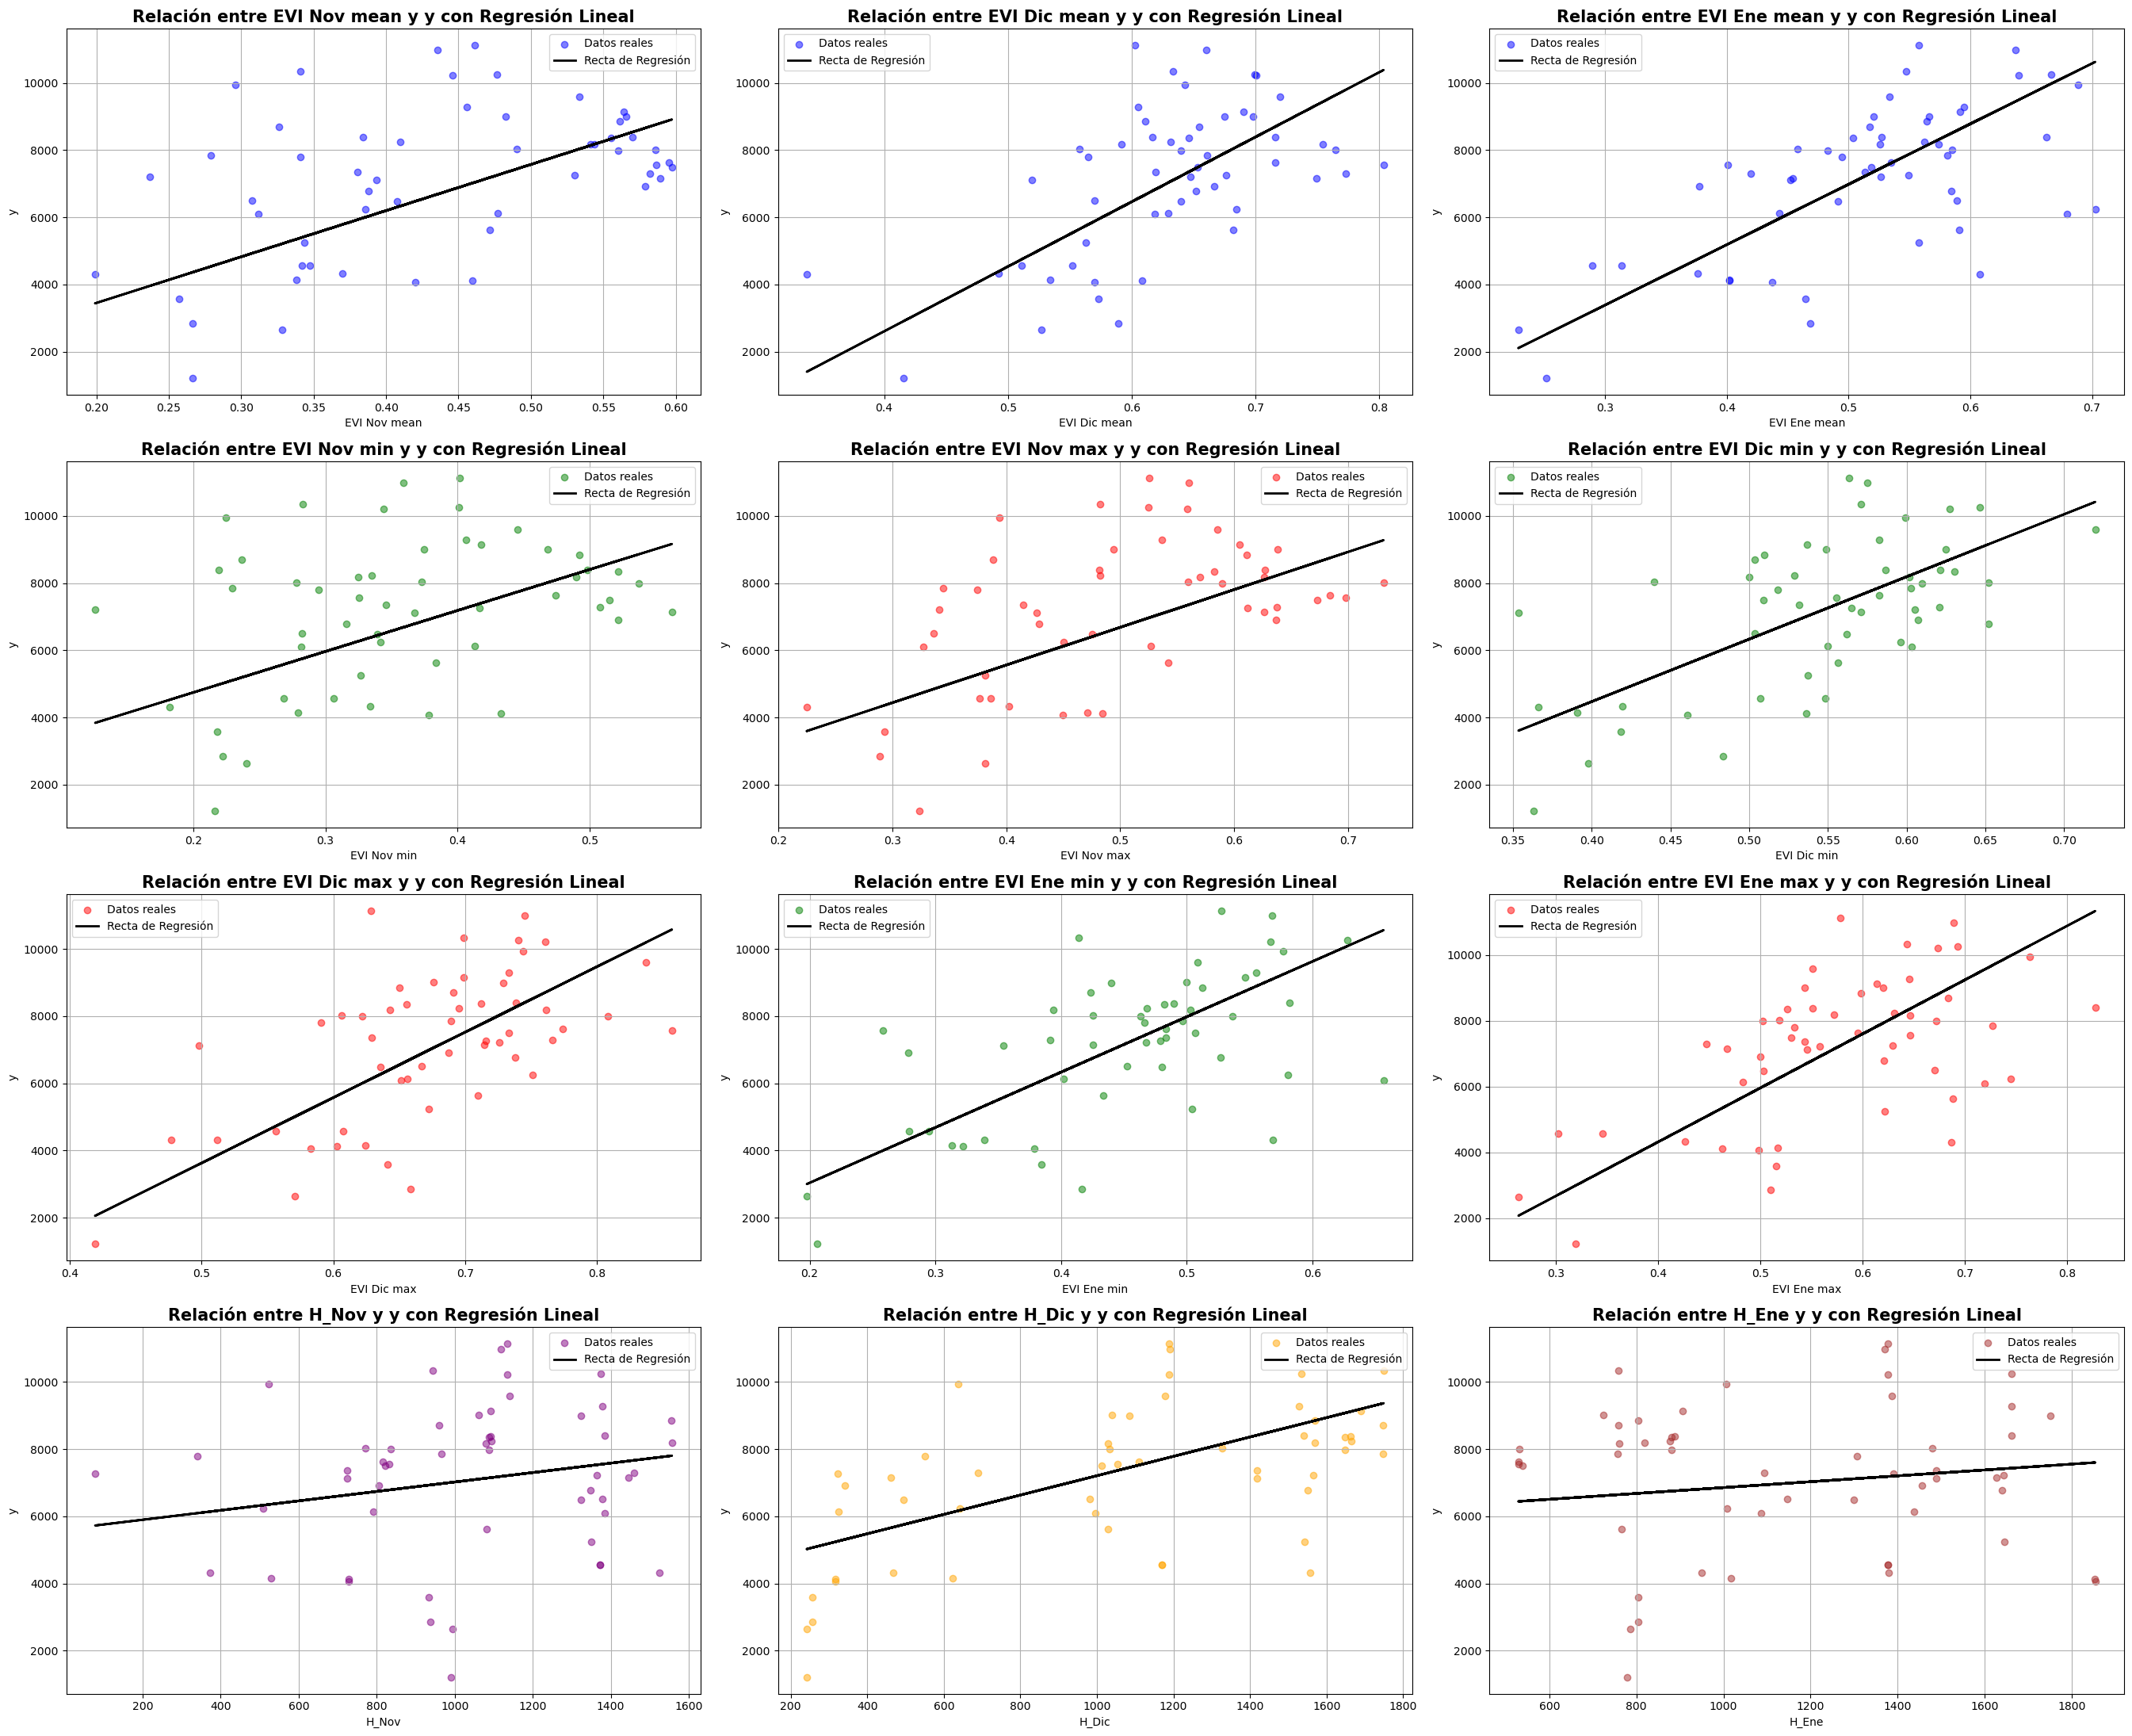

In [ ]:
columns_to_plot = ['EVI Nov mean','EVI Dic mean', 'EVI Ene mean', 'EVI Nov min',
       'EVI Nov max', 'EVI Dic min', 'EVI Dic max', 'EVI Ene min',
       'EVI Ene max','H_Nov', 'H_Dic', 'H_Ene',]

color_dict = {
    'mean': 'blue',
    'min': 'green',
    'max': 'red',
    'H_Nov': 'purple',
    'H_Dic': 'orange',
    'H_Ene': 'brown'
}

num_rows = 4
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(27, 22))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(columns_to_plot):
    row = i // num_cols
    col = i % num_cols

    lin_reg.fit(X_train[[column]], y_train)

    y_pred = lin_reg.predict(X_test[[column]])

    for key in color_dict:
        if key in column:
            color = color_dict[key]
            break

    axes[row, col].scatter(X_test[column], y_test, alpha=0.5, label='Datos reales', color=color)
    axes[row, col].plot(X_test[column], y_pred, color='black', linewidth=2, label='Recta de Regresión')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel("y")
    axes[row, col].set_title(f'Relación entre {column} y y con Regresión Lineal', fontsize=15, fontweight='bold')
    axes[row, col].legend()
    axes[row, col].grid(True)

plt.tight_layout()
plt.savefig("Graficos")
plt.show()

*Extra:* se combinaron todas las columnas de índice EVI del dataframe con el propósito de intentar comprender si es que por sí solas ajustan una mejor recta, pero los resultados no mejoraron con respecto a la regresión original con el dataset de entrenamiento.

In [ ]:
columns_original = ['EVI Nov mean', 'EVI Dic mean', 'EVI Ene mean', 'EVI Nov min',
                   'EVI Nov max', 'EVI Dic min', 'EVI Dic max', 'EVI Ene min', 'EVI Ene max', 'H_Nov', 'H_Dic', 'H_Ene']

columns_mean = [col for col in columns_original if 'EVI' in col]

Evi_train = X_train[columns_mean].mean(axis=1).to_frame(name='EVI mean')
Evi_test = X_test[columns_mean].mean(axis=1).to_frame(name='EVI mean')

Error cuadrático medio (MSE): 2219081.2571446765
Coeficiente de determinación (R^2): 0.5467410664277619


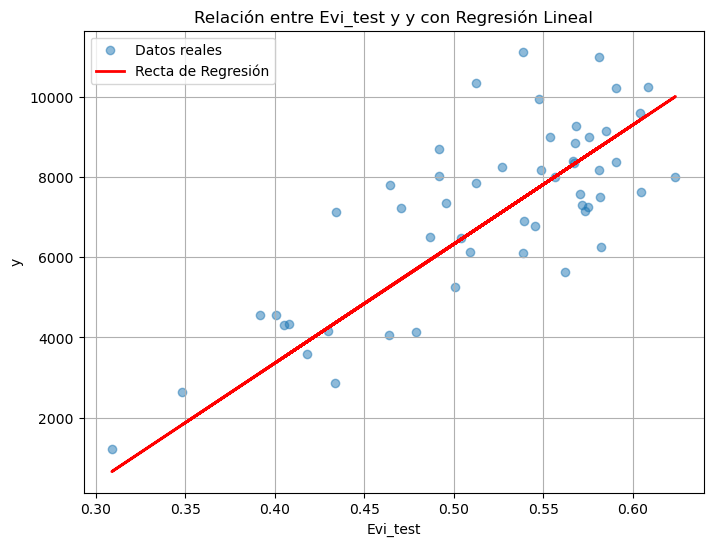

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(Evi_train, y_train)

y_pred = lin_reg.predict(Evi_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R^2): {r2}")

plt.figure(figsize=(8, 6))
plt.scatter(Evi_test, y_test, alpha=0.5, label='Datos reales')
plt.plot(Evi_test, y_pred, color='red', linewidth=2, label='Recta de Regresión')
plt.xlabel("Evi_test")
plt.ylabel("y")
plt.title(f'Relación entre Evi_test y y con Regresión Lineal')
plt.legend()
plt.grid(True)
plt.show()

## Regresión Lineal
* Error cuadrático medio (MSE): 0.21001886910779566 <br>
* Error absoluto medio (MSE): 0.3613411787524718 <br>
* Coeficiente de determinación (R^2): 0.5960908066876592



## *Random Forest:*

Para intentar conseguir una mejor predicción de los datos, se optó por un modelo que no es precisamente lineal, se trata del módulo de sklearn de RandomForestRegressor, el cual a diferencia de la regresión lineal simple busca hacer las predicciones del target a partir de generar arboles de decisión, estos toman distintos criterios de decisión (umbrales) y observan el comportamiento de los datos para esos umbrales,  dividiendo los datos según pertenezcan o no a un rango especifico de ese umbral. El modelo de Random Forest lo que hace precisamente es generar tantos arboles como se les pase por parámetros y buscar el criterio común que haya salido del total de decisiones. Observemos los resultados...


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

random_forest = RandomForestRegressor(max_leaf_nodes=8, n_estimators=100, n_jobs=-1,
                      random_state=42)

random_forest.fit(X_train_dum, y_train)

y_pred = random_forest.predict(X_test_dum)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Error absoluto medio (MSE): {mae}")
print(f"Coeficiente de determinación (R^2): {r2}")

Error cuadrático medio (MSE): 1523842.5002358106
Error absoluto medio (MSE): 966.8910371590317
Coeficiente de determinación (R^2): 0.6887472126741028


### *Resultados:*
Observamos que este modelo obtuvo mejores resultados que el de regresión lineal simple, con un r2 de 0.68 y un error absoluto medio de 965 kg. Nótese que para este caso trabajamos el dataframe solo dummificado pero no escalado, ya que una característica de random forest es que suele trabajar mejor con los datos originales en contraposición con los datos escalados. Esto puede ser una ventaja, ya que los dataframes que necesita requieren menor preprocesamiento.


Tanto para este modelo como para otros (mayormente de clasificación) existen técnicas capaces de encontrar los hiperparámetros que mejor ajusten el modelo a el caso de estudio, esto es posible gracias a un módulo de la librería de sklearn llamado GridSearchCV, el cual genera una grilla de hiperparámetros y luego genera instancias de modelado para cada una de las combinaciones que existan en la grilla. Es decir, si tenemos 3 valores para un hiperparámetro y 3 para el otro se evaluarán 9 tipos de modelos diferentes. Una ventaja de este módulo es que permite extraer el mejor estimador.

In [ ]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

param_grid = [
    # Prueba 9 (3x3) combinaciones de hiperparámetros
    {'n_estimators': [100, 200, 500], 'max_leaf_nodes': [8, 16, 24]},
    # Luego prueba 6 (2x3) combinaciones con bootstrap en False
    {'bootstrap': [False], 'n_estimators': [100, 500], 'max_features': [2, 3, 4]},
]

rnd_clf = RandomForestRegressor(n_jobs=-1, random_state=42)
grid_search = GridSearchCV(rnd_clf, param_grid, cv=5, scoring='f1_weighted', return_train_score=True)

grid_search.fit(X_train_dum, y_train)
best_params = grid_search.best_params_

print("Mejores parámetros encontrados:", best_params)

Mejores parámetros encontrados: {'max_leaf_nodes': 8, 'n_estimators': 100}


Otra gran ventaja de random forest es que cuenta con un metodo llamado feature_importances_ que ordena las características del DataFrame según el nivel de importancia que tuvieron en el proceso de modelado. De esta manera se creó una serie ordenada de las características más importantes

In [ ]:
random_forest.feature_importances_
feature_importances = {name: score for name, score in zip(list(X_train), random_forest.feature_importances_)}
feature_importances_sorted = pd.Series(feature_importances).sort_values(ascending=False)
feature_importances_sorted.head(10)

H_Nov           0.160222
EVI Nov max     0.154611
EVI Dic max     0.126676
EVI Ene min     0.123697
EVI Nov mean    0.121936
EVI Dic mean    0.094838
EVI Dic min     0.079190
EVI Nov min     0.049679
EVENTO          0.033586
EVI Ene max     0.020049
dtype: float64

## *Gráficos RF*

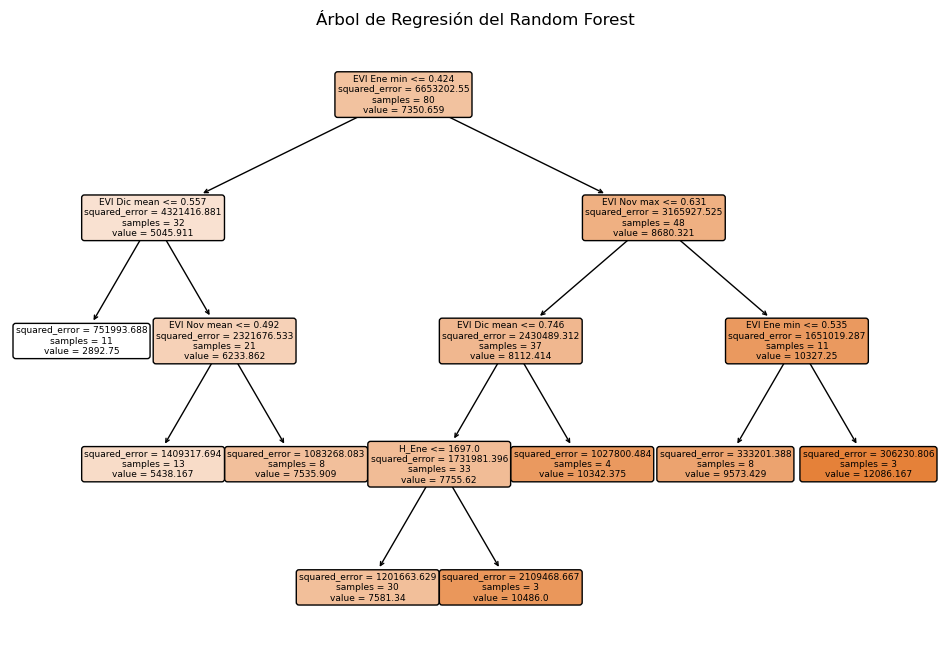

In [ ]:
from sklearn.tree import plot_tree

tree = random_forest.estimators_[5]

plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=X_train_dum.columns, rounded=True)
plt.title("Árbol de Regresión del Random Forest")
plt.show()

## Ramdom Forest
* Error cuadrático medio (MSE): 0.16639719439351922 <br>
* Error absoluto medio (MSE): 0.315569183769631 <br>
* Coeficiente de determinación (R^2): 0.6899841993129352

## *Suport Vector Machine:*
Se generó un modelo SVM para comparar con los demas.

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Crear una instancia del modelo de SVM para regresión
svm_regressor = SVR(kernel='linear')

# Entrenar el modelo en los datos de entrenamiento
svm_regressor.fit(X_train_dum, y_train)

# Realizar predicciones en los datos de prueba
y_pred = svm_regressor.predict(X_test_dum)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Error absoluto medio (MSE): {mae}")
print(f"Coeficiente de determinación (R^2): {r2}")

Error cuadrático medio (MSE): 3162400.9348484087
Error absoluto medio (MSE): 1453.1373526941138
Coeficiente de determinación (R^2): 0.3540630967693371


## SVM
* Error cuadrático medio (MSE): 0.19602898205820682 <br>
* Error absoluto medio (MSE): 0.34316919849054345 <br>
* Coeficiente de determinación (R^2): 0.6229962176954192

## *Resultados:*
Se puede observar claramente que este fué el peor de los 3 modelos probados, con un r2 de 0.35 y un error absoluto medio de 1450 kg podemos afirmar que es el modelo que peor entiende los datos de este caso en puntual.

## *Conclusión y discusión*
Luego de haber generado instancias para los diferentes modelos, podemos concluir que, a pesar de tener pocos datos, estos se comportaron de manera más que aceptable en términos de eficiencia. Sin embargo, existen diferencias entre ellos, siendo el modelo de Random Forest el que mejor se comportó en este caso de estudio. Esto se debe a que su algoritmo no realiza predicciones de manera lineal y suele trabajar de manera más eficiente con variables heterogéneas en comparación con otros tipos de modelos. Con este modelo, obtuvimos una precisión de R^2 de 0.69 y un error absoluto medio de 966 kg, lo cual es un error bajo si consideramos que el rango de los datos objetivo oscila entre 7500 kg y 13500 kg. A partir del método "feature_importances_" del Random Forest, podemos concluir que los eventos de El Niño, La Niña o Neutro no tuvieron la incidencia esperada en los resultados y que, en general, los índices EVI mínimo, promedio y máximo para los meses de noviembre, diciembre y enero son suficientes para realizar predicciones más que aceptables sobre el rendimiento de las cosechas de trigo con 2 meses de anticipación a la cosecha.